In [107]:
import os
import glob
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import shapely
import numpy as np
import math
import sklearn
from sklearn.cluster import KMeans
from shapely import ops, geometry
import random

# generate shapefile

In [40]:
widths_files = glob.glob(r'D:\Research\sidewalk_wheelchair\DC_DOMs_measuremens3\*.csv')
len(widths_files)

141578

## merge csv files

In [42]:
saved_file = r'D:\Research\sidewalk_wheelchair\DC_DOMs_measuremens3\merged.csv'
dfs = []
for idx, f in enumerate(widths_files):
    df = pd.read_csv(f)
    dfs.append(df)
    if idx % 500  == 0:
        print("processin: ", idx)
    #lines = df.apply(get_line, axis=1)
    #gdf = gpd.GeoDataFrame(df, geometry=lines)
    # basename = os.path.basename(f).replace(".csv", ".shp")
    # new_name = os.path.join(saved_path, basename)
    #gdf.to_file(new_name)
df_merged = pd.concat(dfs)
df_merged.to_csv(saved_file, index=False)

processin:  0
processin:  500
processin:  1000
processin:  1500
processin:  2000
processin:  2500
processin:  3000
processin:  3500
processin:  4000
processin:  4500
processin:  5000
processin:  5500
processin:  6000
processin:  6500
processin:  7000
processin:  7500
processin:  8000
processin:  8500
processin:  9000
processin:  9500
processin:  10000
processin:  10500
processin:  11000
processin:  11500
processin:  12000
processin:  12500
processin:  13000
processin:  13500
processin:  14000
processin:  14500
processin:  15000
processin:  15500
processin:  16000
processin:  16500
processin:  17000
processin:  17500
processin:  18000
processin:  18500
processin:  19000
processin:  19500
processin:  20000
processin:  20500
processin:  21000
processin:  21500
processin:  22000
processin:  22500
processin:  23000
processin:  23500
processin:  24000
processin:  24500
processin:  25000
processin:  25500
processin:  26000
processin:  26500
processin:  27000
processin:  27500
processin:  2800

In [90]:
df_merged

,panoId,contour_num,center_x,center_y,length,start_x,start_y,end_x,end_y,cover_ratio,is_touched
0,5HuzW5GILysVFfSeGSERag,0,391496.096,138922.662,0.15,391496.046,138922.587,391496.146,138922.737,0.222,0
1,5HuzW5GILysVFfSeGSERag,0,391496.521,138922.387,0.25,391496.446,138922.287,391496.596,138922.487,0.840,0
2,5HuzW5GILysVFfSeGSERag,0,391496.646,138922.287,0.00,391496.646,138922.287,391496.646,138922.287,-1.000,0
3,5HuzW5GILysVFfSeGSERag,1,391502.571,138942.087,0.10,391502.546,138942.037,391502.596,138942.137,0.500,1
4,5HuzW5GILysVFfSeGSERag,1,391502.896,138941.637,0.50,391502.746,138941.437,391503.046,138941.837,0.970,1
...,...,...,...,...,...,...,...,...,...,...,...
174,__zUXvAsCfoodsgxWHyTlQ,8,395121.058,138085.027,2.30,395121.058,138086.177,395121.058,138083.877,0.849,0
175,__zUXvAsCfoodsgxWHyTlQ,8,395120.558,138084.802,1.85,395120.558,138085.727,395120.558,138083.877,0.890,0
176,__zUXvAsCfoodsgxWHyTlQ,8,395120.058,138084.652,1.55,395120.058,138085.427,395120.058,138083.877,0.760,0
177,__zUXvAsCfoodsgxWHyTlQ,8,395119.558,138084.177,0.60,395119.558,138084.477,395119.558,138083.877,0.924,0


In [51]:
df_merged[df_merged['cover_ratio'] > 0.9]

,panoId,contour_num,center_x,center_y,length,start_x,start_y,end_x,end_y,cover_ratio,is_touched
4,5HuzW5GILysVFfSeGSERag,1,391502.896,138941.637,0.50,391502.746,138941.437,391503.046,138941.837,0.970,1
5,5HuzW5GILysVFfSeGSERag,1,391503.221,138941.237,0.95,391502.946,138940.837,391503.496,138941.637,0.961,1
6,5HuzW5GILysVFfSeGSERag,1,391503.496,138940.762,1.10,391503.196,138940.287,391503.796,138941.237,0.977,1
7,5HuzW5GILysVFfSeGSERag,1,391503.796,138940.287,1.40,391503.396,138939.687,391504.196,138940.887,0.909,1
8,5HuzW5GILysVFfSeGSERag,1,391503.996,138939.662,1.35,391503.646,138939.087,391504.346,138940.237,0.955,1
...,...,...,...,...,...,...,...,...,...,...,...
166,__zUXvAsCfoodsgxWHyTlQ,8,395125.033,138085.577,3.50,395125.008,138087.327,395125.058,138083.827,0.951,0
171,__zUXvAsCfoodsgxWHyTlQ,8,395122.558,138085.077,2.50,395122.558,138086.327,395122.558,138083.827,0.919,0
172,__zUXvAsCfoodsgxWHyTlQ,8,395122.058,138084.827,2.00,395122.058,138085.827,395122.058,138083.827,0.993,0
173,__zUXvAsCfoodsgxWHyTlQ,8,395121.558,138084.802,1.95,395121.558,138085.777,395121.558,138083.827,0.992,0


In [11]:
def get_line(series):
    p = Point(series['col'], series['row'])
    p1 = Point(series['end_x'], series['end_y'])
    line = LineString([p1, p])
    return line

In [4]:
saved_path = r'D:\Research\sidewalk_wheelchair\DC_DOMs_width_shapes'
for idx, f in enumerate(widths_files):
    df = pd.read_csv(f)
    lines = df.apply(get_line, axis=1)
    gdf = gpd.GeoDataFrame(df, geometry=lines)
    basename = os.path.basename(f).replace(".csv", ".shp")
    new_name = os.path.join(saved_path, basename)
    gdf.to_file(new_name)

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  


ValueError: Must pass array with one dimension only.

In [5]:
widths_file = r'D:\Research\sidewalk_wheelchair\widths_all4_not_touched.txt'

In [6]:
df_width = pd.read_csv(widths_file)

In [7]:
geo = df.apply(get_line, axis=1)

In [8]:
gdf_width2 = gpd.GeoDataFrame(df, geometry=geo)
gdf_width2.plot()

ValueError: Must pass array with one dimension only.

,panoId,contour_num,center_x,center_y,length,col,row,end_x,end_y,cover_ratio,is_touched,geometry
0,zzyR1A1-hodvLv7uH3-Rug,0,399314.252,137315.644,0.70,399314.252,137315.294,399314.252,137315.994,0.944,0,"LINESTRING (399314.252 137315.294, 399314.252 ..."
1,zzyR1A1-hodvLv7uH3-Rug,0,399314.752,137315.619,0.75,399314.752,137315.244,399314.752,137315.994,0.871,0,"LINESTRING (399314.752 137315.244, 399314.752 ..."
2,zzyR1A1-hodvLv7uH3-Rug,0,399316.752,137316.394,1.10,399316.752,137315.844,399316.752,137316.944,0.971,0,"LINESTRING (399316.752 137315.844, 399316.752 ..."
3,zzyR1A1-hodvLv7uH3-Rug,0,399317.252,137316.319,0.95,399317.252,137315.844,399317.252,137316.794,0.947,0,"LINESTRING (399317.252 137315.844, 399317.252 ..."
4,zzyR1A1-hodvLv7uH3-Rug,2,399306.302,137316.969,0.85,399306.302,137316.544,399306.302,137317.394,0.862,0,"LINESTRING (399306.302 137316.544, 399306.302 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,RyURfV8-j3aXhParlpCcrg,3,399297.163,137314.709,2.85,399297.163,137313.284,399297.163,137316.134,0.990,0,"LINESTRING (399297.163 137313.284, 399297.163 ..."
96,RyURfV8-j3aXhParlpCcrg,3,399298.163,137314.709,2.85,399298.163,137313.284,399298.163,137316.134,0.985,0,"LINESTRING (399298.163 137313.284, 399298.163 ..."
97,RyURfV8-j3aXhParlpCcrg,3,399298.663,137314.609,2.75,399298.663,137313.234,399298.663,137315.984,0.984,0,"LINESTRING (399298.663 137313.234, 399298.663 ..."
98,RyURfV8-j3aXhParlpCcrg,3,399299.163,137314.484,3.00,399299.163,137312.984,399299.163,137315.984,0.960,0,"LINESTRING (399299.163 137312.984, 399299.163 ..."


In [60]:
geo = [LineString([Point(row['col'], row["row"]), Point(row['end_x'], row['end_y'])]) for idx, row in df_width.iloc[:].iterrows()]

In [61]:
list(geo[111110].coords)

[(401265.178, 132163.727), (401267.228, 132161.777)]

In [62]:
gdf_width = gpd.GeoDataFrame(df_width, geometry=geo)

In [63]:
gdf_width.to_file("D:\widths_4_attributes.shp")

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [3]:
files = glob.glob(r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\*.jpg')



In [5]:
for idx, j in enumerate(files[:]):
    new_name = j.replace(".jpg", '_5.jpg')
    
    os.rename(j, new_name)
    
    if idx % 1000 == 0:
        print(idx, j)


0 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\--0O-2sTlrlaK3fneW4cDg.jpg
1000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\-hJwcO_sGzHdwkvsiD64rw.jpg
2000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\-Umod-zP85u86IXGJC4LrA.jpg
3000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\0azBhjt0BMtq9atgkr2MyQ.jpg
4000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\0nUdVxnWiGq36DeToDe5iQ.jpg
5000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\1-r0f-O14KIBvQjFgBA5Jg.jpg
6000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\1Hm52w9GHh1qhHxxVPSNeQ.jpg
7000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_

63000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\gy7fuou2e6Ga0uyQjzU54g.jpg
64000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\h6Z4jqqvC4lLzE3MVDpxiQ.jpg
65000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\HeSWj4B8XpRX5oZwCDf4uA.jpg
66000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\HlEpbQNPxkTfFhMtOJL24A.jpg
67000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\hRPy1AUs5-IPN_zaUm5TGQ.jpg
68000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\hxUnrJ1RHcFfgISTFyolNQ.jpg
69000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\I6CorbWKBuNDqgCeQ9cdtQ.jpg
70000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_whe

126000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\TgT3osKZo59UST7n8SbRrQ.jpg
127000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\TMziT1wzB4Ax0uBfF_k-iA.jpg
128000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\tTBf73sSDt2TtSX8ZsuBsA.jpg
129000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\TZOM-60FV1UneLPkQX6X0A.jpg
130000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\U9l6ceCFKptoAM78-Eb3aQ.jpg
131000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\uG3Ee8iPvrovcAXUXif-Tw.jpg
132000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\DC_panoramas\UM3m_BEw9mriBSTTlyf4ow.jpg
133000 E:\USC_OneDrive\OneDrive - University of South Carolina\Research\side

In [8]:
zoom = 4
for z in range(5, zoom, -1):
    print(z)

5


In [41]:
import numpy as np
a = np.ones((100, 100))

In [56]:
a[1, 100:103].sum()

0.0

# Filter raw measurements

In [24]:
widths_raw = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\width_measurements_raw2.shp'

# gdf_widths_raw = gpd.read_file(widths_raw)

In [56]:
len(gdf_widths_raw)

17576160

In [57]:
gdf_widths_raw.head()

,panoId,contour_nu,center_x,center_y,length,start_x,start_y,end_x,end_y,cover_rati,is_touched,geometry
0,5HuzW5GILysVFfSeGSERag,0,391496.096,138922.662,0.15,391496.046,138922.587,391496.146,138922.737,0.222,0,"LINESTRING (391496.146 138922.737, 391496.046 ..."
1,5HuzW5GILysVFfSeGSERag,0,391496.521,138922.387,0.25,391496.446,138922.287,391496.596,138922.487,0.840,0,"LINESTRING (391496.596 138922.487, 391496.446 ..."
2,5HuzW5GILysVFfSeGSERag,0,391496.646,138922.287,0.00,391496.646,138922.287,391496.646,138922.287,-1.000,0,"LINESTRING (391496.646 138922.287, 391496.646 ..."
3,5HuzW5GILysVFfSeGSERag,1,391502.571,138942.087,0.10,391502.546,138942.037,391502.596,138942.137,0.500,1,"LINESTRING (391502.596 138942.137, 391502.546 ..."
4,5HuzW5GILysVFfSeGSERag,1,391502.896,138941.637,0.50,391502.746,138941.437,391503.046,138941.837,0.970,1,"LINESTRING (391503.046 138941.837, 391502.746 ..."


In [58]:
saved_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\measurements_no_walkway_no_short.shp'
nowalkway_gdf = gdf_widths_raw[gdf_widths_raw['cover_rati'] > 0.9]
nowalkway_gdf

,panoId,contour_nu,center_x,center_y,length,start_x,start_y,end_x,end_y,cover_rati,is_touched,geometry
4,5HuzW5GILysVFfSeGSERag,1,391502.896,138941.637,0.50,391502.746,138941.437,391503.046,138941.837,0.970,1,"LINESTRING (391503.046 138941.837, 391502.746 ..."
5,5HuzW5GILysVFfSeGSERag,1,391503.221,138941.237,0.95,391502.946,138940.837,391503.496,138941.637,0.961,1,"LINESTRING (391503.496 138941.637, 391502.946 ..."
6,5HuzW5GILysVFfSeGSERag,1,391503.496,138940.762,1.10,391503.196,138940.287,391503.796,138941.237,0.977,1,"LINESTRING (391503.796 138941.237, 391503.196 ..."
7,5HuzW5GILysVFfSeGSERag,1,391503.796,138940.287,1.40,391503.396,138939.687,391504.196,138940.887,0.909,1,"LINESTRING (391504.196 138940.887, 391503.396 ..."
8,5HuzW5GILysVFfSeGSERag,1,391503.996,138939.662,1.35,391503.646,138939.087,391504.346,138940.237,0.955,1,"LINESTRING (391504.346 138940.237, 391503.646 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
17576147,__zUXvAsCfoodsgxWHyTlQ,8,395125.033,138085.577,3.50,395125.008,138087.327,395125.058,138083.827,0.951,0,"LINESTRING (395125.058 138083.827, 395125.008 ..."
17576152,__zUXvAsCfoodsgxWHyTlQ,8,395122.558,138085.077,2.50,395122.558,138086.327,395122.558,138083.827,0.919,0,"LINESTRING (395122.558 138083.827, 395122.558 ..."
17576153,__zUXvAsCfoodsgxWHyTlQ,8,395122.058,138084.827,2.00,395122.058,138085.827,395122.058,138083.827,0.993,0,"LINESTRING (395122.058 138083.827, 395122.058 ..."
17576154,__zUXvAsCfoodsgxWHyTlQ,8,395121.558,138084.802,1.95,395121.558,138085.777,395121.558,138083.827,0.992,0,"LINESTRING (395121.558 138083.827, 395121.558 ..."


In [59]:
nowalkway_no_short_gdf = nowalkway_gdf[nowalkway_gdf['length'] > 0.3]
nowalkway_no_short_gdf

,panoId,contour_nu,center_x,center_y,length,start_x,start_y,end_x,end_y,cover_rati,is_touched,geometry
4,5HuzW5GILysVFfSeGSERag,1,391502.896,138941.637,0.50,391502.746,138941.437,391503.046,138941.837,0.970,1,"LINESTRING (391503.046 138941.837, 391502.746 ..."
5,5HuzW5GILysVFfSeGSERag,1,391503.221,138941.237,0.95,391502.946,138940.837,391503.496,138941.637,0.961,1,"LINESTRING (391503.496 138941.637, 391502.946 ..."
6,5HuzW5GILysVFfSeGSERag,1,391503.496,138940.762,1.10,391503.196,138940.287,391503.796,138941.237,0.977,1,"LINESTRING (391503.796 138941.237, 391503.196 ..."
7,5HuzW5GILysVFfSeGSERag,1,391503.796,138940.287,1.40,391503.396,138939.687,391504.196,138940.887,0.909,1,"LINESTRING (391504.196 138940.887, 391503.396 ..."
8,5HuzW5GILysVFfSeGSERag,1,391503.996,138939.662,1.35,391503.646,138939.087,391504.346,138940.237,0.955,1,"LINESTRING (391504.346 138940.237, 391503.646 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
17576147,__zUXvAsCfoodsgxWHyTlQ,8,395125.033,138085.577,3.50,395125.008,138087.327,395125.058,138083.827,0.951,0,"LINESTRING (395125.058 138083.827, 395125.008 ..."
17576152,__zUXvAsCfoodsgxWHyTlQ,8,395122.558,138085.077,2.50,395122.558,138086.327,395122.558,138083.827,0.919,0,"LINESTRING (395122.558 138083.827, 395122.558 ..."
17576153,__zUXvAsCfoodsgxWHyTlQ,8,395122.058,138084.827,2.00,395122.058,138085.827,395122.058,138083.827,0.993,0,"LINESTRING (395122.058 138083.827, 395122.058 ..."
17576154,__zUXvAsCfoodsgxWHyTlQ,8,395121.558,138084.802,1.95,395121.558,138085.777,395121.558,138083.827,0.992,0,"LINESTRING (395121.558 138083.827, 395121.558 ..."


In [60]:
saved_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\measurements_no_walkway_no_short.gpkg'
nowalkway_no_short_gdf.to_file(saved_file, driver="GPKG")

# move roadways to sidewalk line

In [62]:
# for sidewalks detected from GSV
#shp_file = r'D:\Research\sidewalk_wheelchair\widths_all4_not_touched3.shp'
#road_shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\DC_Roadway_Block-shp\Roadway_Block6487.shp'

# for ground truth
# wait...

# for sidewalks detected from GSV
# widths_file1 = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\width_measurements_raw_nearest_part2.shp'
# widths_file2 = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\width_measurements_raw_nearest.shp'
# gdf_widths1 = gpd.read_file(widths_file1)
# gdf_widths2 = gpd.read_file(widths_file2)
# gdf_widths = gpd.GeoDataFrame(pd.concat([gdf_widths1, gdf_widths2], ignore_index=True))


widths_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\measurements_no_walkway_no_short.gpkg'
gdf_widths = gpd.read_file(widths_file, layer=r'no_walkway_no_short_gpkg_nearest')

gdf_widths

,panoId,contour_nu,center_x,center_y,length,start_x,start_y,end_x,end_y,cover_rati,is_touched,NEAR_FID,NEAR_DIST,NEAR_X,NEAR_Y,NEAR_ANGLE,geometry
0,5HuzW5GILysVFfSeGSERag,1,391502.90625,138941.640625,0.50,391502.75000,138941.437500,391503.03125,138941.843750,0.970,1,1288,14.003550,391493.573116,138930.855997,-130.922676,"MULTILINESTRING ((391503.046 138941.837, 39150..."
1,5HuzW5GILysVFfSeGSERag,1,391503.21875,138941.234375,0.95,391502.93750,138940.843750,391503.50000,138941.640625,0.961,1,1288,13.681202,391493.984267,138930.499562,-130.922676,"MULTILINESTRING ((391503.496 138941.637, 39150..."
2,5HuzW5GILysVFfSeGSERag,1,391503.50000,138940.765625,1.10,391503.18750,138940.281250,391503.78125,138941.234375,0.977,1,1288,13.429385,391494.399217,138930.139834,-130.922676,"MULTILINESTRING ((391503.796 138941.237, 39150..."
3,5HuzW5GILysVFfSeGSERag,1,391503.78125,138940.281250,1.40,391503.40625,138939.687500,391504.18750,138940.890625,0.909,1,1288,13.064757,391495.864023,138929.011926,-125.205521,"MULTILINESTRING ((391504.196 138940.887, 39150..."
4,5HuzW5GILysVFfSeGSERag,1,391504.00000,138939.656250,1.35,391503.65625,138939.093750,391504.34375,138940.234375,0.955,1,1288,12.718631,391496.313568,138928.694742,-125.205521,"MULTILINESTRING ((391504.346 138940.237, 39150..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9943379,__zUXvAsCfoodsgxWHyTlQ,8,395125.03125,138085.578125,3.50,395125.00000,138087.328125,395125.06250,138083.828125,0.951,0,7966,3.792544,395125.099106,138080.034678,-89.378986,"MULTILINESTRING ((395125.058 138083.827, 39512..."
9943380,__zUXvAsCfoodsgxWHyTlQ,8,395122.56250,138085.078125,2.50,395122.56250,138086.328125,395122.56250,138083.828125,0.919,0,7966,3.819641,395122.599399,138080.007584,-89.378986,"MULTILINESTRING ((395122.558 138083.827, 39512..."
9943381,__zUXvAsCfoodsgxWHyTlQ,8,395122.06250,138084.828125,2.00,395122.06250,138085.828125,395122.06250,138083.828125,0.993,0,7966,3.825060,395122.099458,138080.002165,-89.378986,"MULTILINESTRING ((395122.058 138083.827, 39512..."
9943382,__zUXvAsCfoodsgxWHyTlQ,8,395121.56250,138084.796875,1.95,395121.56250,138085.781250,395121.56250,138083.828125,0.992,0,7966,3.830479,395121.599517,138079.996746,-89.378986,"MULTILINESTRING ((395121.558 138083.827, 39512..."


In [66]:
gdf_widths['Shape_Leng'] = gdf_widths['length']

In [63]:
road_shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\DC_Roadway_Block-shp\Road_split_at_intersection.shp'

gdf_road = gpd.read_file(road_shp_file)
gdf_road.head(1)

,OBJECTID,ROUTEID,FROMMEASUR,TOMEASURE,ROUTENAME,ROADTYPE,BLOCKKEY,TOTALTRAVE,TOTALPARKI,TOTALRAISE,...,RPPDIRECTI,RPPSIDE,SLOWSTREET,SHAPELEN,SHAPE_1,FID_0,Road_FID,length_m,Split_FID,geometry
0,68801,14047972,530.475586,653.120911,INDEPENDENCE AVE SW,1,17645a0bbbce8d16873b6d4134041c21,6,2,0,...,None,None,None,0,None,0,0,122.645757,1,"LINESTRING Z (398682.974 135526.034 0.000, 398..."


In [64]:
def degree_difference(angle1, angle2, apex=True):
    diff = abs(angle1 - angle2) % 360
    if apex:
        if diff > 180:
            diff = 360 - diff
    #print(diff)
    return diff

def find_smallest_angle(angle, angle_list):
    diff = [degree_difference(angle, a) for a in angle_list]
    return np.argmin(diff)
    
find_smallest_angle((90 - 90)%360, [179, 359])

1

Wait 10 minutes to load the data!

Processing row #:  0
Before filtering 435 rows, after filtering 201 rows.
road_direction: 180.05793131062498
left, right angle: 89.82584922993374 269.70254056084804
width_kmeans_list: [3.716379332131353, 0.5]


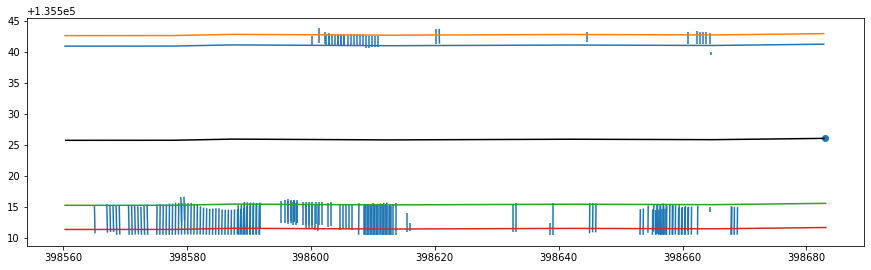

Road Split_FID = 4 has 0 width measurement, skipped.
Road Split_FID = 11 has 0 width measurement, skipped.
Road Split_FID = 13 has 0 width measurement, skipped.
Road Split_FID = 15 has 0 width measurement, skipped.
Error in idx: 18 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 25 has 0 width measurement, skipped.
Road Split_FID = 33 has 0 width measurement, skipped.
Road Split_FID = 37 has 0 width measurement, skipped.
Road Split_FID = 47 has 0 width measurement, skipped.
Road Split_FID = 56 has 0 width measurement, skipped.
Road Split_FID = 58 has 0 width measurement, skipped.
Error in idx: 62 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 68 has 0 width measurement, skipped.
Road Split_FID = 72 has 0 width measurement, skipped.
Road Split_FID = 74 has 0 width measurement, skipped.
Road Split_FID = 75 has 0 width measurement, skipped.
Road Split_FID = 88 has 0 width measurement, skipped.
Road Split_FID = 89 has 0 width measurem

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 272 has 0 width measurement, skipped.
Road Split_FID = 273 has 0 width measurement, skipped.
Road Split_FID = 274 has 0 width measurement, skipped.
Road Split_FID = 277 has 0 width measurement, skipped.
Road Split_FID = 278 has 0 width measurement, skipped.
Error in idx: 284 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 294 has 0 width measurement, skipped.
Road Split_FID = 296 has 0 width measurement, skipped.
Error in idx: 298 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 302 has 0 width measurement, skipped.
Error in idx: 307 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 311 has 0 width measurement, skipped.
Road Split_FID = 313 has 0 width measurement, skipped.
Road Split_FID = 322 has 0 width measurement, skipped.
Road Split_FID = 325 has 0 width measurement, skipped.
Road Split_FID = 326 has 0 width measurement, skipped.
Road Split_FID = 333 has 0 width measurement, skipped.
Road Split_FID = 334 has 0 width measurement, skipped.
Road

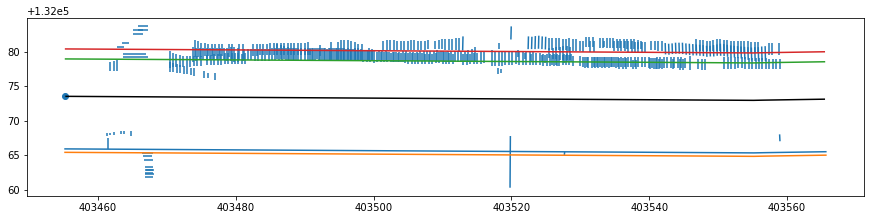

Road Split_FID = 503 has 0 width measurement, skipped.
Road Split_FID = 506 has 0 width measurement, skipped.
Road Split_FID = 509 has 0 width measurement, skipped.
Road Split_FID = 511 has 0 width measurement, skipped.
Road Split_FID = 515 has 0 width measurement, skipped.
Road Split_FID = 518 has 0 width measurement, skipped.
Error in idx: 522 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 532 has 0 width measurement, skipped.
Road Split_FID = 536 has 0 width measurement, skipped.
Road Split_FID = 543 has 0 width measurement, skipped.
Road Split_FID = 544 has 0 width measurement, skipped.
Road Split_FID = 545 has 0 width measurement, skipped.
Road Split_FID = 548 has 0 width measurement, skipped.
Road Split_FID = 567 has 0 width measurement, skipped.
Road Split_FID = 581 has 0 width measurement, skipped.
Road Split_FID = 587 has 0 width measurement, skipped.
Road Split_FID = 615 has 0 width measurement, skipped.
Road Split_FID = 623 has

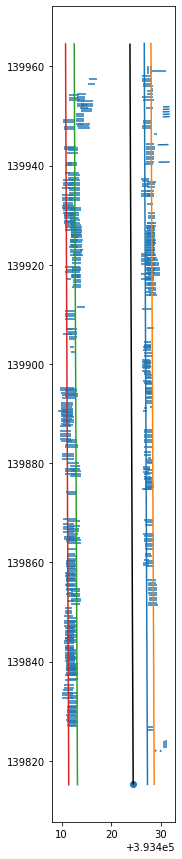

Road Split_FID = 1002 has 0 width measurement, skipped.
Error in idx: 1008 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 1020 has 0 width measurement, skipped.
Road Split_FID = 1033 has 0 width measurement, skipped.
Error in idx: 1047 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 1049 has 0 width measurement, skipped.
Road Split_FID = 1052 has 0 width measurement, skipped.
Road Split_FID = 1055 has 0 width measurement, skipped.
Road Split_FID = 1109 has 0 width measurement, skipped.
Road Split_FID = 1120 has 0 width measurement, skipped.
Road Split_FID = 1127 has 0 width measurement, skipped.
Road Split_FID = 1148 has 0 width measurement, skipped.
Road Split_FID = 1158 has 0 width measurement, skipped.
Road Split_FID = 1165 has 0 width measurement, skipped.
Road Split_FID = 1188 has 0 width measurement, skipped.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 1226 has 0 width measurement, skipped.
Road Split_FID = 1231 has 0 width measurement, skipped.
Road Split_FID = 1244 has 0 width measurement, skipped.
Error in idx: 1247 n_samples=1 should be >= n_clusters=2.
Error in idx: 1258 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 1302 has 0 width measurement, skipped.
Error in idx: 1305 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 1317 has 0 width measurement, skipped.
Error in idx: 1318 n_samples=1 should be >= n_clusters=2.
Error in idx: 1345 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 1366 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 1374 has 0 width measurement, skipped.
Road Split_FID = 1375 has 0 width measurement, skipped.
Error in idx: 1376 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 1395 has 0 width measurement, skipped.
Road Split_FID = 1404 has 0 w

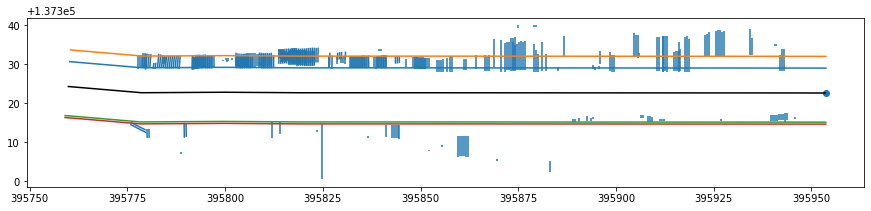

Road Split_FID = 1504 has 0 width measurement, skipped.
Error in idx: 1505 n_samples=1 should be >= n_clusters=2.
Error in idx: 1542 n_samples=1 should be >= n_clusters=2.
Error in idx: 1546 n_samples=1 should be >= n_clusters=2.
Error in idx: 1562 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 1578 has 0 width measurement, skipped.
Road Split_FID = 1583 has 0 width measurement, skipped.
Road Split_FID = 1626 has 0 width measurement, skipped.
Road Split_FID = 1629 has 0 width measurement, skipped.
Road Split_FID = 1659 has 0 width measurement, skipped.
Road Split_FID = 1665 has 0 width measurement, skipped.
Road Split_FID = 1678 has 0 width measurement, skipped.
Error in idx: 1683 n_samples=1 should be >= n_clusters=2.
Error in idx: 1694 n_samples=1 should be >= n_clusters=2.
Error in idx: 1719 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 1725 has 0 width measurement, skipped.
Road Split_FID = 1744 has 0 width measurement, skip

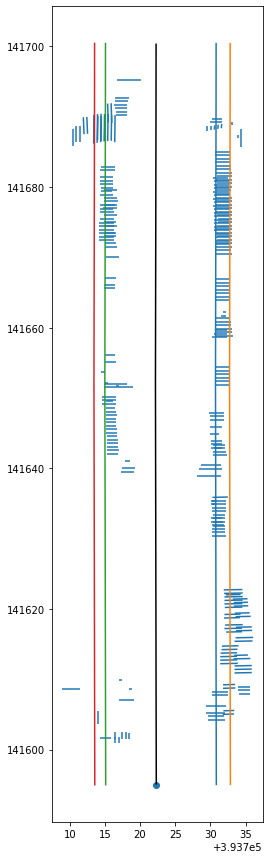

Road Split_FID = 2018 has 0 width measurement, skipped.
Error in idx: 2037 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 2044 has 0 width measurement, skipped.
Error in idx: 2056 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 2059 has 0 width measurement, skipped.
Road Split_FID = 2060 has 0 width measurement, skipped.
Road Split_FID = 2061 has 0 width measurement, skipped.
Error in idx: 2070 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 2080 has 0 width measurement, skipped.
Error in idx: 2090 n_samples=1 should be >= n_clusters=2.
Error in idx: 2102 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 2109 has 0 width measurement, skipped.
Road Split_FID = 2123 has 0 width measurement, skipped.
Road Split_FID = 2124 has 0 width measurement, skipped.
Road Split_FID = 2129 has 0 width measurement, skipped.
Road Split_FID = 2131 has 0 width measurement, skipped.
Road Split_FID = 2135 has 0 width measurement, skipped.

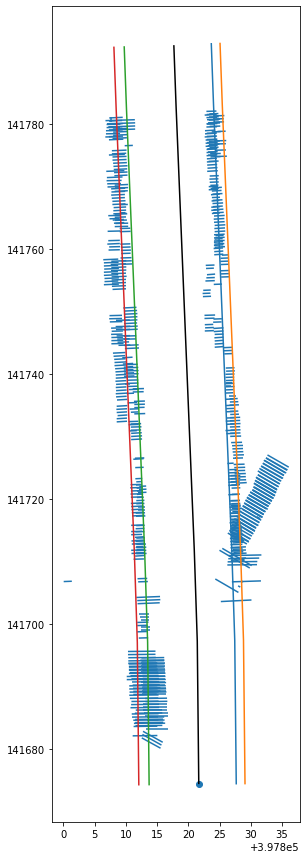

Road Split_FID = 2526 has 0 width measurement, skipped.
Road Split_FID = 2549 has 0 width measurement, skipped.
Road Split_FID = 2552 has 0 width measurement, skipped.
Road Split_FID = 2558 has 0 width measurement, skipped.
Road Split_FID = 2568 has 0 width measurement, skipped.
Road Split_FID = 2571 has 0 width measurement, skipped.
Road Split_FID = 2574 has 0 width measurement, skipped.
Road Split_FID = 2591 has 0 width measurement, skipped.
Road Split_FID = 2595 has 0 width measurement, skipped.
Error in idx: 2631 n_samples=1 should be >= n_clusters=2.
Error in idx: 2633 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 2636 has 0 width measurement, skipped.
Error in idx: 2639 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 2653 has 0 width measurement, skipped.
Error in idx: 2657 n_samples=1 should be >= n_clusters=2.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Error in idx: 2676 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Error in idx: 2699 n_samples=1 should be >= n_clusters=2.
Error in idx: 2713 n_samples=1 should be >= n_clusters=2.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 2728 has 0 width measurement, skipped.
Road Split_FID = 2732 has 0 width measurement, skipped.
Road Split_FID = 2733 has 0 width measurement, skipped.
Road Split_FID = 2740 has 0 width measurement, skipped.
Error in idx: 2743 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 2744 has 0 width measurement, skipped.
Road Split_FID = 2747 has 0 width measurement, skipped.
Road Split_FID = 2750 has 0 width measurement, skipped.
Error in idx: 2757 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 2758 n_samples=1 should be >= n_clusters=2.
Error in idx: 2766 n_samples=1 should be >= n_clusters=2.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 2785 has 0 width measurement, skipped.
Road Split_FID = 2788 has 0 width measurement, skipped.
Error in idx: 2793 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 2795 has 0 width measurement, skipped.
Error in idx: 2839 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 2857 has 0 width measurement, skipped.
Error in idx: 2914 n_samples=1 should be >= n_clusters=2.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 2941 has 0 width measurement, skipped.
Road Split_FID = 2946 has 0 width measurement, skipped.
Road Split_FID = 2947 has 0 width measurement, skipped.
Road Split_FID = 2950 has 0 width measurement, skipped.
Error in idx: 2969 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 2973 has 0 width measurement, skipped.
Road Split_FID = 2976 has 0 width measurement, skipped.
Error in idx: 2983 n_samples=1 should be >= n_clusters=2.
Processing row #:  3000
Before filtering 1082 rows, after filtering 634 rows.
road_direction: 171.4053952739787
left, right angle: 89.78768204231099 269.7989629989342
width_kmeans_list: [1.744310351486864, 1.7050161793779783]


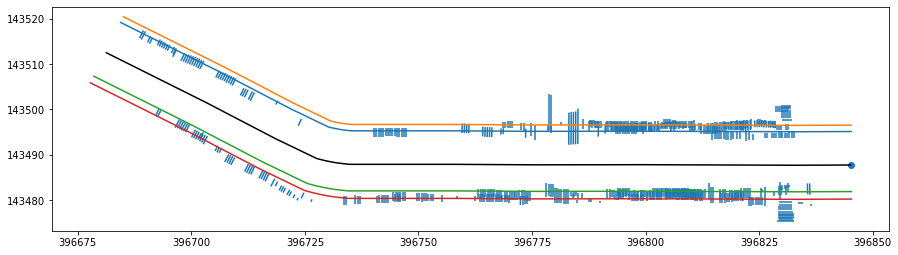

Error in idx: 3021 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 3042 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 3044 has 0 width measurement, skipped.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Error in idx: 3083 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 3088 has 0 width measurement, skipped.
Error in idx: 3089 n_samples=1 should be >= n_clusters=2.
Error in idx: 3115 n_samples=1 should be >= n_clusters=2.
Error in idx: 3116 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 3143 has 0 width measurement, skipped.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 3175 has 0 width measurement, skipped.
Road Split_FID = 3194 has 0 width measurement, skipped.
Road Split_FID = 3202 has 0 width measurement, skipped.
Error in idx: 3207 n_samples=1 should be >= n_clusters=2.
Error in idx: 3218 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 3221 has 0 width measurement, skipped.
Road Split_FID = 3234 has 0 width measurement, skipped.
Error in idx: 3244 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 3265 has 0 width measurement, skipped.
Road Split_FID = 3272 has 0 width measurement, skipped.
Road Split_FID = 3273 has 0 width measurement, skipped.
Road Split_FID = 3293 has 0 width measurement, skipped.
Road Split_FID = 3308 has 0 width measurement, skipped.
Road Split_FID = 3316 has 0 width measurement, skipped.
Road Split_FID = 3326 has 0 width measurement, skipped.
Road Split_FID = 3327 has 0 width measurement, skipped.
Road Split_FID = 3341 has 0 width measurement, skipped.
Roa

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Error in idx: 3376 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 3384 has 0 width measurement, skipped.
Road Split_FID = 3385 has 0 width measurement, skipped.
Error in idx: 3387 n_samples=1 should be >= n_clusters=2.
Error in idx: 3388 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 3390 has 0 width measurement, skipped.
Error in idx: 3395 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 3404 has 0 width measurement, skipped.
Road Split_FID = 3423 has 0 width measurement, skipped.
Road Split_FID = 3426 has 0 width measurement, skipped.
Error in idx: 3486 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 3487 has 0 width measurement, skipped.
Processing row #:  3500
Before filtering 341 rows, after filtering 159 rows.
road_direction: 116.74600330321226
left, right angle: 24.316483909511362 204.3164839095281
width_kmeans_list: [2.2099999921662468, 1.829411762602189]


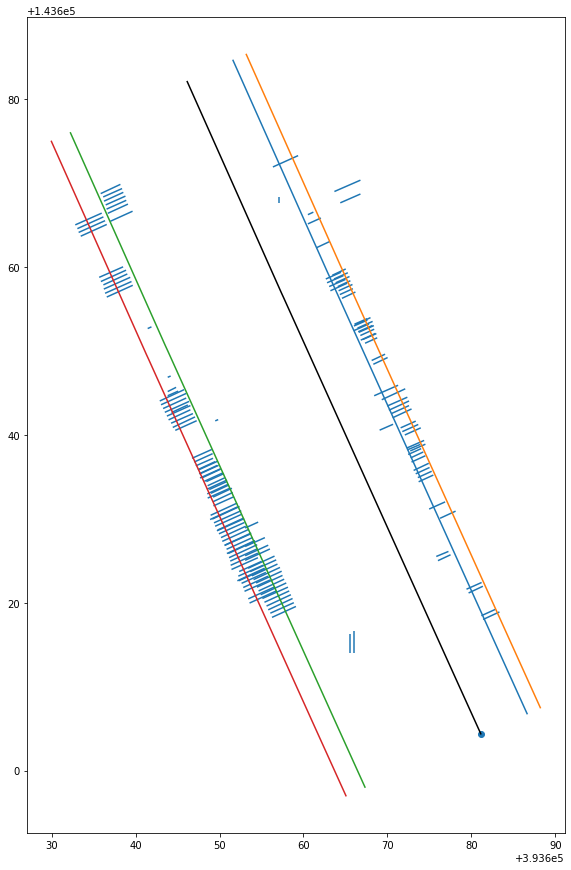

Road Split_FID = 3506 has 0 width measurement, skipped.
Error in idx: 3521 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 3563 has 0 width measurement, skipped.
Road Split_FID = 3565 has 0 width measurement, skipped.
Error in idx: 3579 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 3583 has 0 width measurement, skipped.
Road Split_FID = 3584 has 0 width measurement, skipped.
Road Split_FID = 3626 has 0 width measurement, skipped.
Road Split_FID = 3647 has 0 width measurement, skipped.
Road Split_FID = 3679 has 0 width measurement, skipped.
Road Split_FID = 3688 has 0 width measurement, skipped.
Error in idx: 3700 n_samples=1 should be >= n_clusters=2.
Error in idx: 3713 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 3733 has 0 width measurement, skipped.
Error in idx: 3768 n_samples=1 should be >= n_clusters=2.
Error in idx: 3780 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 3797 has 0 width measurement, skipped.
Road Split_FID = 3803 has 0 width me

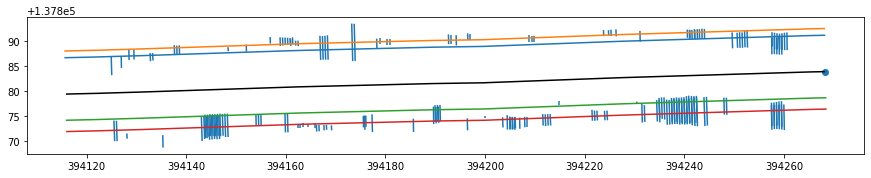

Road Split_FID = 4011 has 0 width measurement, skipped.
Error in idx: 4025 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 4040 has 0 width measurement, skipped.
Road Split_FID = 4054 has 0 width measurement, skipped.
Road Split_FID = 4062 has 0 width measurement, skipped.
Road Split_FID = 4063 has 0 width measurement, skipped.
Road Split_FID = 4066 has 0 width measurement, skipped.
Road Split_FID = 4071 has 0 width measurement, skipped.
Error in idx: 4072 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 4092 has 0 width measurement, skipped.
Error in idx: 4094 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 4096 has 0 width measurement, skipped.
Road Split_FID = 4120 has 0 width measurement, skipped.
Road Split_FID = 4137 has 0 width measurement, skipped.
Error in idx: 4142 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 4153 has 0 width measurement, skipped.
Road Split_FID = 4166 has 0 width measurement, skipped.
Road Split_FID = 4178 has 0 width measur

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Error in idx: 4220 n_samples=1 should be >= n_clusters=2.
Error in idx: 4221 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 4241 has 0 width measurement, skipped.
Road Split_FID = 4242 has 0 width measurement, skipped.
Error in idx: 4249 n_samples=1 should be >= n_clusters=2.
Error in idx: 4262 n_samples=1 should be >= n_clusters=2.
Error in idx: 4281 n_samples=1 should be >= n_clusters=2.
Error in idx: 4302 n_samples=1 should be >= n_clusters=2.
Error in idx: 4307 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 4313 has 0 width measurement, skipped.
Road Split_FID = 4316 has 0 width measurement, skipped.
Road Split_FID = 4319 has 0 width measurement, skipped.
Road Split_FID = 4328 has 0 width measurement, skipped.
Road Split_FID = 4329 has 0 width measurement, skipped.
Road Split_FID = 4333 has 0 width measurement, skipped.
Road Split_FID = 4338 has 0 width measurement, skipped.
Road Split_FID = 4344 has 0 width measurement, skip

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 4491 has 0 width measurement, skipped.
Processing row #:  4500
Before filtering 530 rows, after filtering 130 rows.
road_direction: 180.07857213140667
left, right angle: 90.59429024086276 269.94561389258746
width_kmeans_list: [4.801851816751338, 1.0555555621782942]


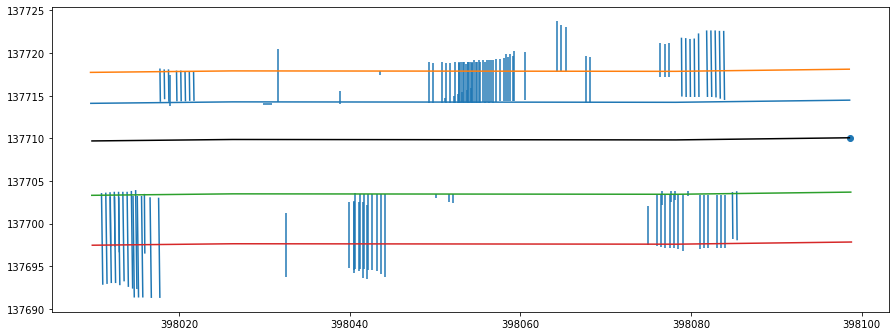

Error in idx: 4502 n_samples=1 should be >= n_clusters=2.
Error in idx: 4509 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 4520 has 0 width measurement, skipped.
Road Split_FID = 4539 has 0 width measurement, skipped.
Error in idx: 4555 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 4565 has 0 width measurement, skipped.
Error in idx: 4567 n_samples=1 should be >= n_clusters=2.
Error in idx: 4571 n_samples=1 should be >= n_clusters=2.
Error in idx: 4575 n_samples=1 should be >= n_clusters=2.
Error in idx: 4605 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 4623 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 4624 has 0 width measurement, skipped.
Road Split_FID = 4657 has 0 width measurement, skipped.
Error in idx: 4698 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 4711 has 0 width measurement, skipped.
Road Split_FID = 4719 has

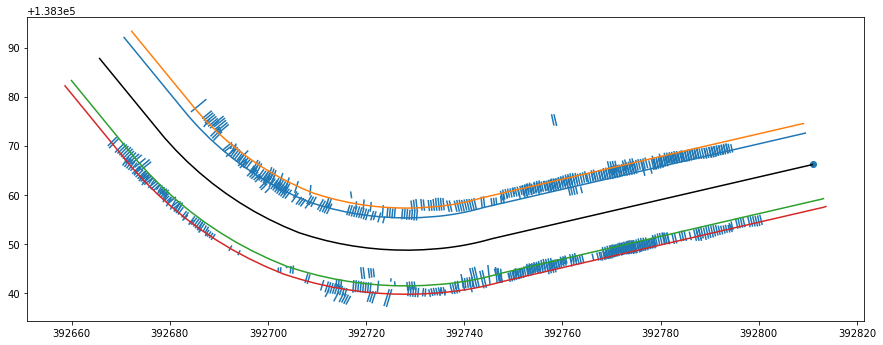

Road Split_FID = 5003 has 0 width measurement, skipped.
Road Split_FID = 5005 has 0 width measurement, skipped.
Road Split_FID = 5008 has 0 width measurement, skipped.
Error in idx: 5028 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 5034 has 0 width measurement, skipped.
Error in idx: 5038 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 5047 has 0 width measurement, skipped.
Road Split_FID = 5054 has 0 width measurement, skipped.
Road Split_FID = 5055 has 0 width measurement, skipped.
Road Split_FID = 5060 has 0 width measurement, skipped.
Road Split_FID = 5068 has 0 width measurement, skipped.
Error in idx: 5081 n_samples=1 should be >= n_clusters=2.
Error in idx: 5103 n_samples=1 should be >= n_clusters=2.
Error in idx: 5115 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 5119 has 0 width measurement, skipped.
Error in idx: 5122 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 5139 has 0 width measurement, skippe

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 5201 has 0 width measurement, skipped.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 5209 has 0 width measurement, skipped.
Error in idx: 5237 n_samples=1 should be >= n_clusters=2.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Error in idx: 5257 n_samples=1 should be >= n_clusters=2.
Error in idx: 5258 n_samples=1 should be >= n_clusters=2.
Error in idx: 5259 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 5261 has 0 width measurement, skipped.
Road Split_FID = 5264 has 0 width measurement, skipped.
Error in idx: 5273 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 5274 has 0 width measurement, skipped.
Road Split_FID = 5275 has 0 width measurement, skipped.
Error in idx: 5281 n_samples=1 should be >= n_clusters=2.
Error in idx: 5296 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 5297 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 5299 has 0 width measurement, skipped.
Road Split_FID = 5337 has 0 width measurement, skipped.
Road Split_FID = 5345 has 0 width measurement, skipped.
Road Split_FID = 5348 has 0 width measurement, skipped.
Error in idx: 5367 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split

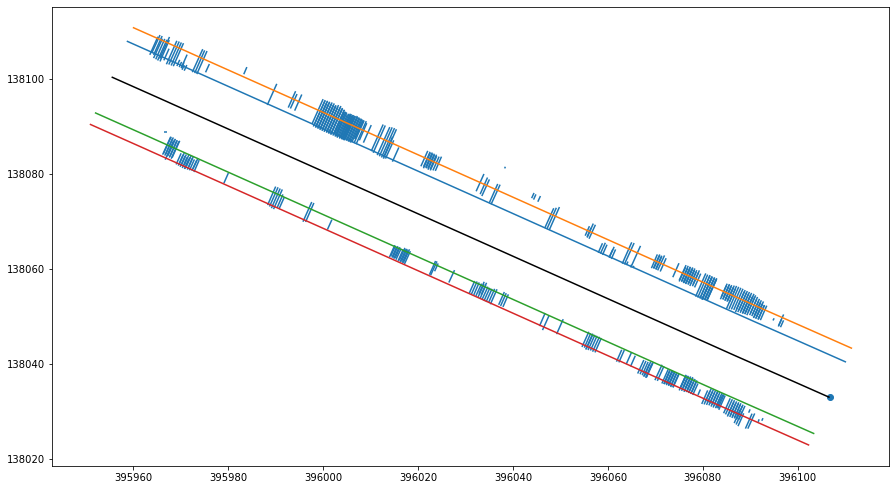

Road Split_FID = 5503 has 0 width measurement, skipped.
Road Split_FID = 5506 has 0 width measurement, skipped.
Road Split_FID = 5523 has 0 width measurement, skipped.
Road Split_FID = 5536 has 0 width measurement, skipped.
Road Split_FID = 5554 has 0 width measurement, skipped.
Road Split_FID = 5570 has 0 width measurement, skipped.
Error in idx: 5580 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 5582 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 5616 has 0 width measurement, skipped.
Road Split_FID = 5634 has 0 width measurement, skipped.
Road Split_FID = 5647 has 0 width measurement, skipped.
Road Split_FID = 5655 has 0 width measurement, skipped.
Road Split_FID = 5658 has 0 width measurement, skipped.
Road Split_FID = 5668 has 0 width measurement, skipped.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 5729 has 0 width measurement, skipped.
Error in idx: 5787 n_samples=1 should be >= n_clusters=2.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 5791 has 0 width measurement, skipped.
Error in idx: 5808 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 5817 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 5831 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 5835 has 0 width measurement, skipped.
Error in idx: 5840 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 5895 has 0 width measurement, skipped.
Error in idx: 5909 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 5929 has 0 width measurement, skipped.
Road Split_FID = 5933 has 0 width measurement, skipped.
Road Split_FID = 5945 has 0 width measurement, skipped.
Road Split_FID = 5948 has 0 width measurement, skipped.
Road Split_FID = 5949 has 0 width measurement, skipped.
Road Split_FID = 5961 has 0 width measurement, skipped.
Error in idx: 5977 n_samples=1 should be >= n_clusters=2.
Processing row #:  6000
Before 

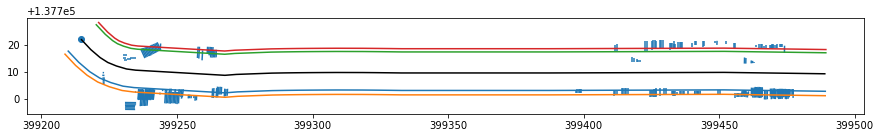

Road Split_FID = 6006 has 0 width measurement, skipped.
Road Split_FID = 6008 has 0 width measurement, skipped.
Error in idx: 6044 n_samples=1 should be >= n_clusters=2.
Error in idx: 6076 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 6091 has 0 width measurement, skipped.
Error in idx: 6092 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 6112 has 0 width measurement, skipped.
Road Split_FID = 6114 has 0 width measurement, skipped.
Error in idx: 6145 n_samples=1 should be >= n_clusters=2.
Error in idx: 6166 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 6180 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 6184 n_samples=1 should be >= n_clusters=2.
Error in idx: 6262 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 6272 has 0 width measurement, skipped.
Error in idx: 6279 n_samples=1 should be >= n_clusters=2.
Error in idx: 6297 Found 

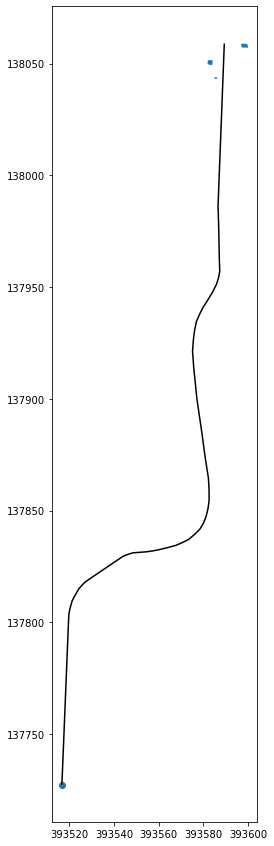

Error in idx: 7001 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 7034 has 0 width measurement, skipped.
Error in idx: 7044 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 7052 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 7090 has 0 width measurement, skipped.
Road Split_FID = 7106 has 0 width measurement, skipped.
Road Split_FID = 7155 has 0 width measurement, skipped.
Error in idx: 7172 n_samples=1 should be >= n_clusters=2.
Error in idx: 7173 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 7194 has 0 width measurement, skipped.
Road Split_FID = 7195 has 0 width measurement, skipped.
Error in idx: 7196 n_samples=1 should be >= n_clusters=2.
Error in idx: 7230 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 7232 has 0 width measurement, skipped.
Road Split_FID = 7244 has 0 width measurement, skipped.
Error in idx: 7258 n_samples=1 should be >= n_clusters=2.
Error in i

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 7306 has 0 width measurement, skipped.
Error in idx: 7337 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 7339 has 0 width measurement, skipped.
Error in idx: 7347 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 7352 has 0 width measurement, skipped.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 7366 has 0 width measurement, skipped.
Error in idx: 7386 n_samples=1 should be >= n_clusters=2.
Error in idx: 7422 n_samples=1 should be >= n_clusters=2.
Error in idx: 7441 n_samples=1 should be >= n_clusters=2.
Error in idx: 7450 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 7456 has 0 width measurement, skipped.
Road Split_FID = 7461 has 0 width measurement, skipped.
Road Split_FID = 7466 has 0 width measurement, skipped.
Error in idx: 7477 n_samples=1 should be >= n_clusters=2.
Error in idx: 7493 n_samples=1 should be >= n_clusters=2.
Error in idx: 7497 n_samples=1 should be >= n_clusters=2.
Processing row #:  7500
Before filtering 444 rows, after filtering 293 rows.
road_direction: 318.9815140079943
left, right angle: 224.84996775183146 44.849967752055846
width_kmeans_list: [1.895977014782785, 1.7902298790627509]


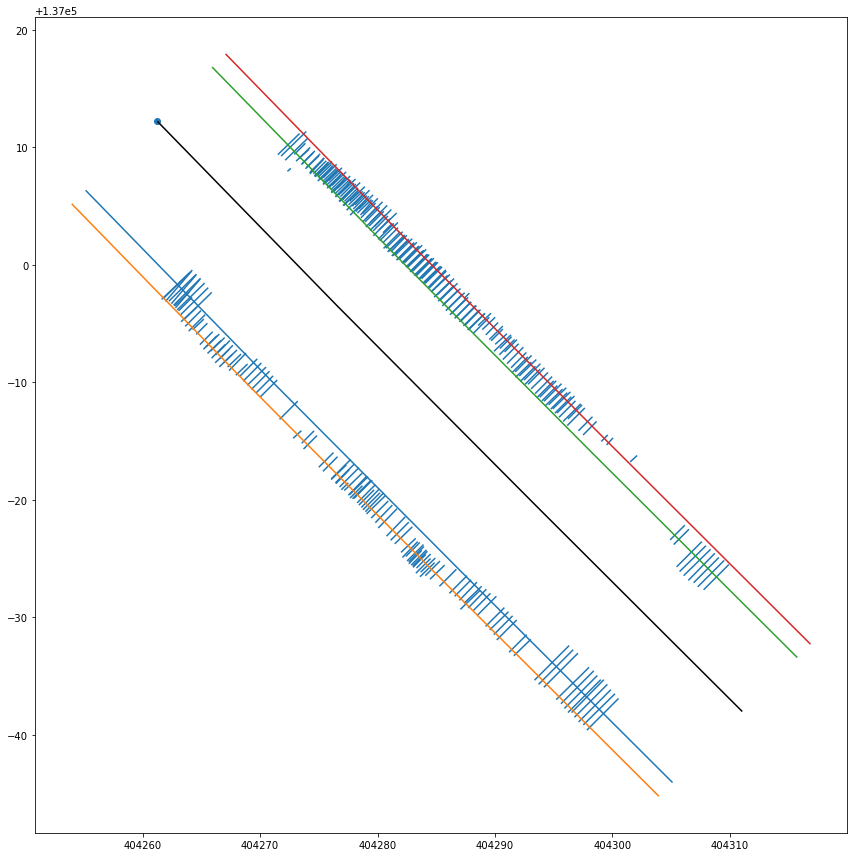

Road Split_FID = 7506 has 0 width measurement, skipped.
Road Split_FID = 7519 has 0 width measurement, skipped.
Error in idx: 7543 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 7554 has 0 width measurement, skipped.
Error in idx: 7577 n_samples=1 should be >= n_clusters=2.
Error in idx: 7588 n_samples=1 should be >= n_clusters=2.
Error in idx: 7607 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 7614 has 0 width measurement, skipped.
Road Split_FID = 7619 has 0 width measurement, skipped.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Error in idx: 7620 n_samples=1 should be >= n_clusters=2.
Error in idx: 7685 n_samples=1 should be >= n_clusters=2.
Error in idx: 7686 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 7693 has 0 width measurement, skipped.
Error in idx: 7712 n_samples=1 should be >= n_clusters=2.
Error in idx: 7739 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 7743 has 0 width measurement, skipped.
Error in idx: 7759 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 7773 has 0 width measurement, skipped.
Road Split_FID = 7777 has 0 width measurement, skipped.
Error in idx: 7783 n_samples=1 should be >= n_clusters=2.
Error in idx: 7792 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 7794 has 0 width measurement, skipped.
Error in idx: 7797 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 7800 has 0 width measurement, skipped.
Error in idx: 7806 n_samples=1 should be >= n_clusters=2.
Road S

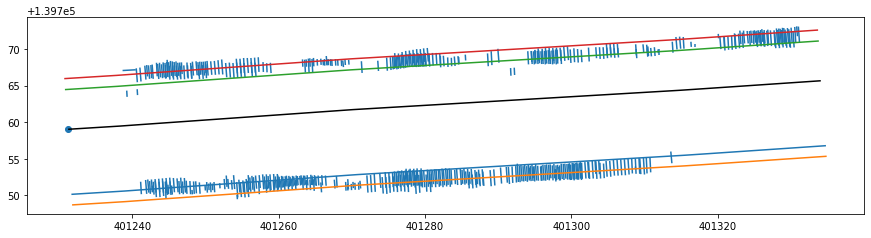

Error in idx: 8015 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 8030 has 0 width measurement, skipped.
Error in idx: 8031 n_samples=1 should be >= n_clusters=2.
Error in idx: 8033 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 8054 has 0 width measurement, skipped.
Error in idx: 8058 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 8060 has 0 width measurement, skipped.
Road Split_FID = 8065 has 0 width measurement, skipped.
Error in idx: 8067 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 8081 has 0 width measurement, skipped.
Road Split_FID = 8089 has 0 width measurement, skipped.
Road Split_FID = 8137 has 0 width measurement, skipped.
Error in idx: 8138 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 8145 has 0 width measurement, skipped.
Error in idx: 8147 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 8156 n_samples=

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Error in idx: 8207 n_samples=1 should be >= n_clusters=2.
Error in idx: 8219 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 8220 has 0 width measurement, skipped.
Road Split_FID = 8232 has 0 width measurement, skipped.
Road Split_FID = 8244 has 0 width measurement, skipped.
Road Split_FID = 8251 has 0 width measurement, skipped.
Error in idx: 8269 n_samples=1 should be >= n_clusters=2.
Error in idx: 8290 n_samples=1 should be >= n_clusters=2.
Error in idx: 8291 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 8327 has 0 width measurement, skipped.
Road Split_FID = 8350 has 0 width measurement, skipped.
Error in idx: 8390 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 8406 has 0 width measurement, skipped.
Road Split_FID = 8407 has 0 width measurement, skipped.
Road Split_FID = 8408 has 0 width measurement, skipped.
Road Split_FID = 8409 has 0 width measurement, skipped.
Road Split_FID = 8416 has 0 width measurement, skippe

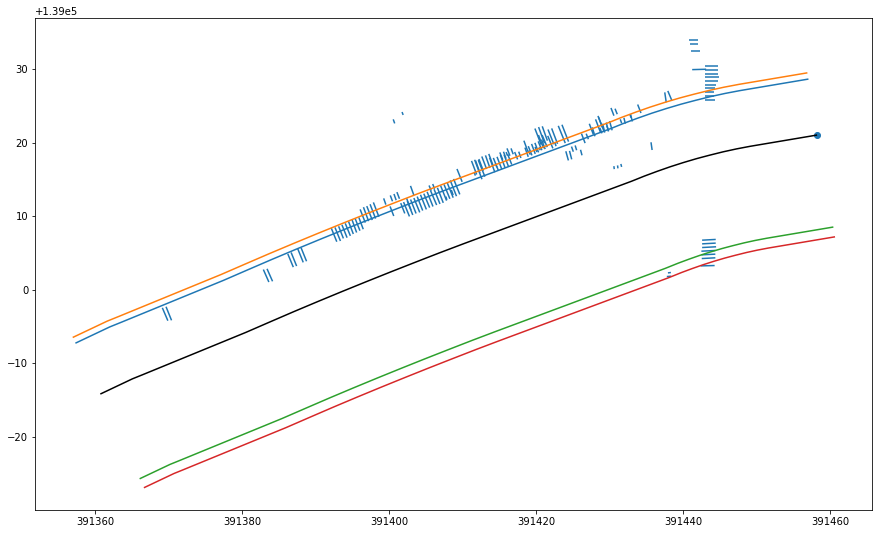

Road Split_FID = 8556 has 0 width measurement, skipped.
Error in idx: 8574 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 8593 has 0 width measurement, skipped.
Road Split_FID = 8601 has 0 width measurement, skipped.
Road Split_FID = 8603 has 0 width measurement, skipped.
Error in idx: 8612 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 8621 has 0 width measurement, skipped.
Road Split_FID = 8627 has 0 width measurement, skipped.
Road Split_FID = 8657 has 0 width measurement, skipped.
Error in idx: 8675 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 8689 has 0 width measurement, skipped.
Road Split_FID = 8691 has 0 width measurement, skipped.
Error in idx: 8719 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 8723 has 0 width measurement, skipped.
Road Split_FID = 8743 has 0 width measurement, skipped.
Road Split_FID = 8746 has 0 width measurement, skipped.
Road Split_FID = 8770 has 0 width measurement, skipped.
R

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Error in idx: 8918 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 8927 has 0 width measurement, skipped.
Error in idx: 8937 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 8952 has 0 width measurement, skipped.
Road Split_FID = 8959 has 0 width measurement, skipped.
Road Split_FID = 8964 has 0 width measurement, skipped.
Road Split_FID = 8971 has 0 width measurement, skipped.
Error in idx: 8981 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Processing row #:  9000
Before filtering 1551 rows, after filtering 892 rows.
road_direction: 179.9708983371206
left, right angle: 89.93714124483161 269.93714124465805
width_kmeans_list: [1.4384180879862298, 1.1703999934196476]


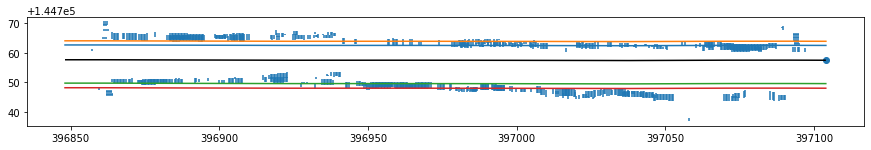

Road Split_FID = 9016 has 0 width measurement, skipped.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 9031 has 0 width measurement, skipped.
Road Split_FID = 9059 has 0 width measurement, skipped.
Road Split_FID = 9074 has 0 width measurement, skipped.
Road Split_FID = 9077 has 0 width measurement, skipped.
Road Split_FID = 9081 has 0 width measurement, skipped.
Error in idx: 9085 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 9103 has 0 width measurement, skipped.
Error in idx: 9141 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 9173 has 0 width measurement, skipped.
Error in idx: 9269 n_samples=1 should be >= n_clusters=2.
Error in idx: 9290 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 9296 has 0 width measurement, skipped.
Road Split_FID = 9301 has 0 width measurement, skipped.
Road Split_FID = 9316 has 0 width measurement, skipped.
Road Split_FID = 9341 has 0 width measurement, skipped.
Road Split_FID = 9352 has 0 width measurement, skipped.
Road Split_FID = 9363 has 0 width measurement, skipped.
R

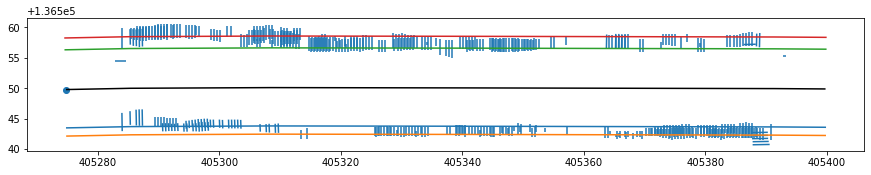

Road Split_FID = 9515 has 0 width measurement, skipped.
Road Split_FID = 9532 has 0 width measurement, skipped.
Road Split_FID = 9534 has 0 width measurement, skipped.
Error in idx: 9549 n_samples=1 should be >= n_clusters=2.
Error in idx: 9555 n_samples=1 should be >= n_clusters=2.
Error in idx: 9573 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 9587 has 0 width measurement, skipped.
Road Split_FID = 9592 has 0 width measurement, skipped.
Road Split_FID = 9610 has 0 width measurement, skipped.
Error in idx: 9659 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 9660 has 0 width measurement, skipped.
Error in idx: 9676 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 9686 has 0 width measurement, skipped.
Error in idx: 9691 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 9696 has 0 width measurement, skipped.
Error in idx: 9701 n_samples=1 should be >= n_clusters=2.
Error in idx: 9703 Found array with 0 sample(s) (sh

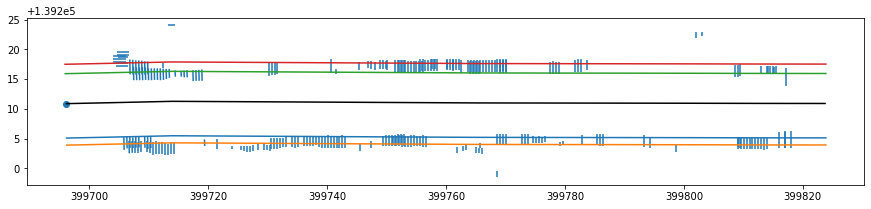

Road Split_FID = 10006 has 0 width measurement, skipped.
Error in idx: 10007 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 10019 has 0 width measurement, skipped.
Road Split_FID = 10030 has 0 width measurement, skipped.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 10044 has 0 width measurement, skipped.
Road Split_FID = 10069 has 0 width measurement, skipped.
Road Split_FID = 10105 has 0 width measurement, skipped.
Road Split_FID = 10112 has 0 width measurement, skipped.
Road Split_FID = 10113 has 0 width measurement, skipped.
Road Split_FID = 10136 has 0 width measurement, skipped.
Road Split_FID = 10140 has 0 width measurement, skipped.
Error in idx: 10180 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 10196 has 0 width measurement, skipped.
Error in idx: 10207 n_samples=1 should be >= n_clusters=2.
Error in idx: 10216 n_samples=1 should be >= n_clusters=2.
Error in idx: 10230 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 10241 has 0 width measurement, skipped.
Road Split_FID = 10245 has 0 width measurement, skipped.
Road Split_FID = 10249 has 0 width measurement, skipped.
Road Split_FID = 10261 has 0 width measurement, skipped.
Error in idx: 10278 n_samples=1 should be

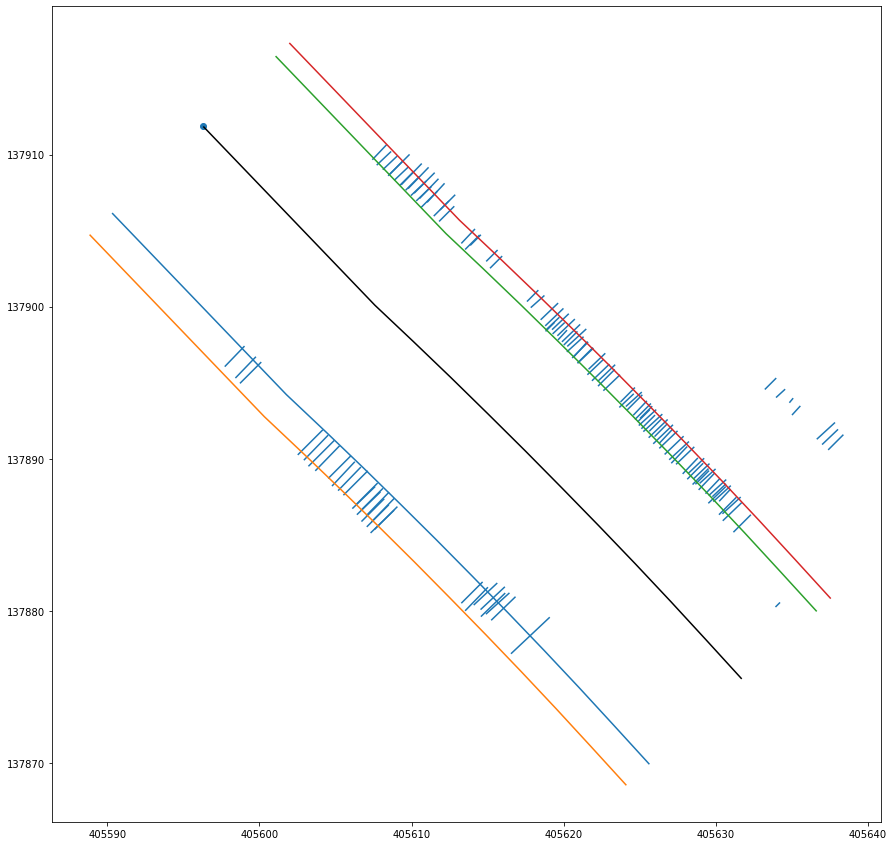

Road Split_FID = 10502 has 0 width measurement, skipped.
Error in idx: 10513 n_samples=1 should be >= n_clusters=2.
Error in idx: 10529 n_samples=1 should be >= n_clusters=2.
Error in idx: 10537 n_samples=1 should be >= n_clusters=2.
Error in idx: 10543 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 10550 has 0 width measurement, skipped.
Road Split_FID = 10555 has 0 width measurement, skipped.
Error in idx: 10570 n_samples=1 should be >= n_clusters=2.
Error in idx: 10572 n_samples=1 should be >= n_clusters=2.
Error in idx: 10574 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 10653 has 0 width measurement, skipped.
Error in idx: 10668 n_samples=1 should be >= n_clusters=2.
Error in idx: 10693 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 10704 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 10721 has 0 width measurement, skipped.
Road Split_FID = 10762 has 0 width measurement, skipped.
Road Split_FID = 10771 has 0 

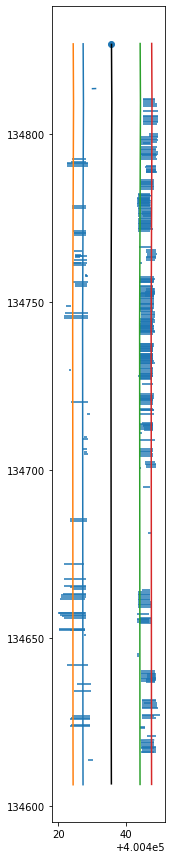

Road Split_FID = 11004 has 0 width measurement, skipped.
Error in idx: 11013 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 11018 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 11031 has 0 width measurement, skipped.
Road Split_FID = 11043 has 0 width measurement, skipped.
Road Split_FID = 11045 has 0 width measurement, skipped.
Road Split_FID = 11055 has 0 width measurement, skipped.
Road Split_FID = 11060 has 0 width measurement, skipped.
Error in idx: 11061 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 11062 has 0 width measurement, skipped.
Road Split_FID = 11064 has 0 width measurement, skipped.
Error in idx: 11072 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 11074 n_samples=1 should be >= n_clusters=2.
Error in idx: 11076 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 11082 has 0 width measurement, skipped.
Error in idx: 11

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 11212 has 0 width measurement, skipped.
Road Split_FID = 11221 has 0 width measurement, skipped.
Road Split_FID = 11226 has 0 width measurement, skipped.
Road Split_FID = 11230 has 0 width measurement, skipped.
Road Split_FID = 11232 has 0 width measurement, skipped.
Error in idx: 11235 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 11237 has 0 width measurement, skipped.
Road Split_FID = 11258 has 0 width measurement, skipped.
Road Split_FID = 11267 has 0 width measurement, skipped.
Road Split_FID = 11268 has 0 width measurement, skipped.
Road Split_FID = 11276 has 0 width measurement, skipped.
Error in idx: 11277 n_samples=1 should be >= n_clusters=2.
Error in idx: 11281 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 11287 has 0 width measurement, skipped.
Road Split_FID = 11293 has 0 width measurement, skipped.
Road Split_FID = 11299 has 0 width measurement, skipped.
Error in idx: 11308 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 11310 

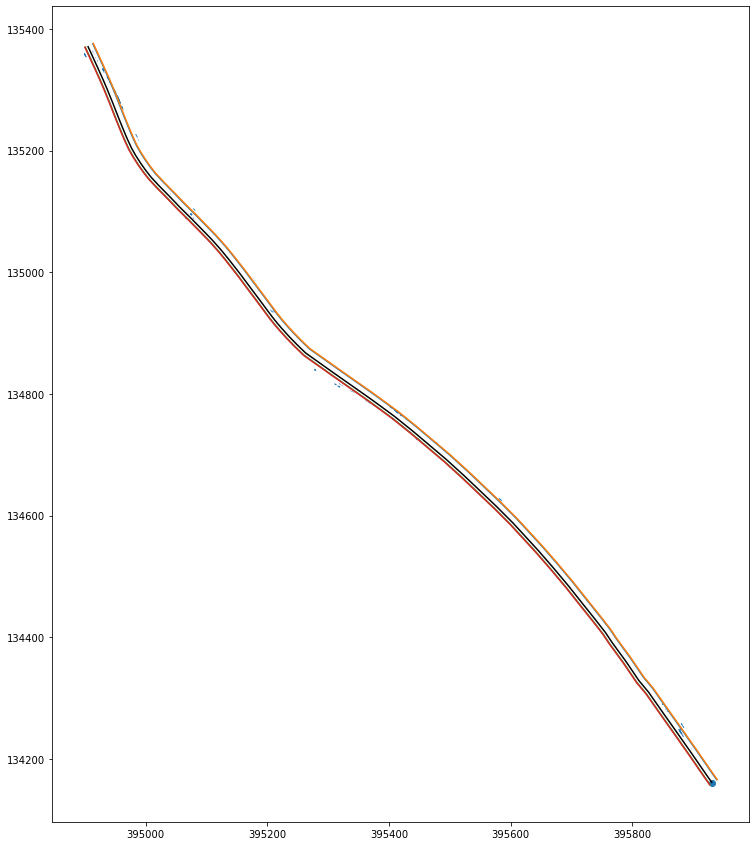

Road Split_FID = 11503 has 0 width measurement, skipped.
Road Split_FID = 11517 has 0 width measurement, skipped.
Error in idx: 11519 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 11527 has 0 width measurement, skipped.
Error in idx: 11536 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 11538 n_samples=1 should be >= n_clusters=2.
Error in idx: 11548 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 11549 has 0 width measurement, skipped.
Road Split_FID = 11553 has 0 width measurement, skipped.
Road Split_FID = 11557 has 0 width measurement, skipped.
Error in idx: 11565 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 11572 has 0 width measurement, skipped.
Road Split_FID = 11574 has 0 width measurement, skipped.
Road Split_FID = 11578 has 0 width measurement, skipped.
Road Split_FID = 11594 has 0 width measurement, skipped.
Road Split_FID = 11596 has 0 width measurement, skipped.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 12266 has 0 width measurement, skipped.
Road Split_FID = 12268 has 0 width measurement, skipped.
Road Split_FID = 12273 has 0 width measurement, skipped.
Road Split_FID = 12274 has 0 width measurement, skipped.
Road Split_FID = 12278 has 0 width measurement, skipped.
Error in idx: 12281 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 12283 has 0 width measurement, skipped.
Road Split_FID = 12292 has 0 width measurement, skipped.
Road Split_FID = 12294 has 0 width measurement, skipped.
Error in idx: 12295 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 12296 has 0 width measurement, skipped.
Road Split_FID = 12303 has 0 width measurement, skipped.
Error in idx: 12314 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 12316 has 0 width measurement, skipped.
Road Split_FID = 12319 has 0 width measurement, skipped.
Error in idx: 12332 Found array with 0 sample(s) (shape=(0, 1

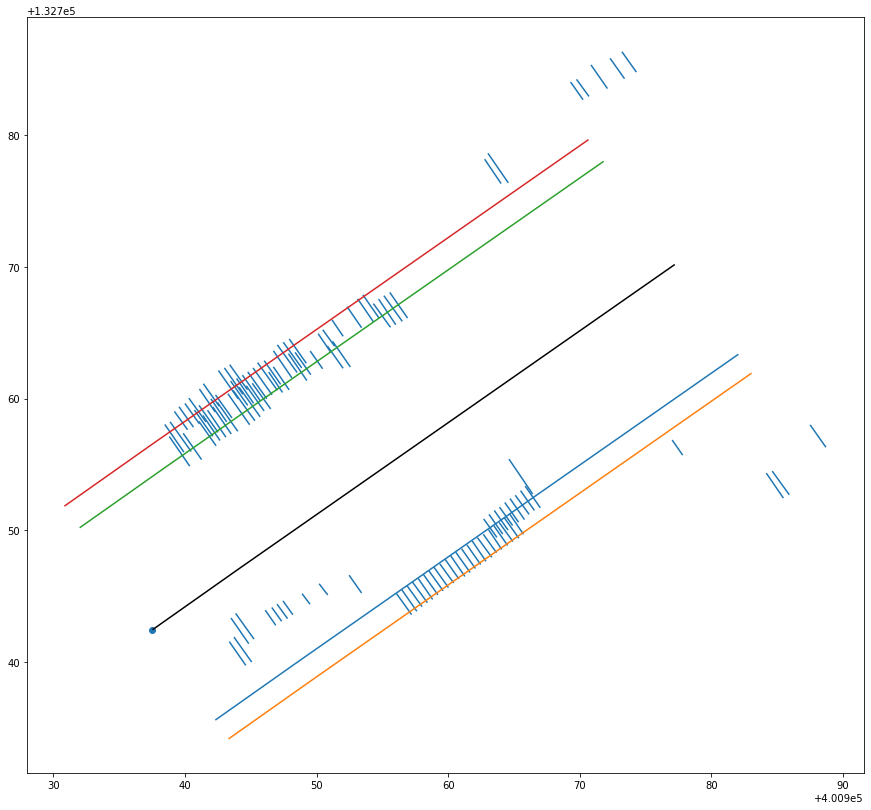

Road Split_FID = 12503 has 0 width measurement, skipped.
Road Split_FID = 12524 has 0 width measurement, skipped.
Error in idx: 12528 n_samples=1 should be >= n_clusters=2.
Error in idx: 12563 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 12570 has 0 width measurement, skipped.
Road Split_FID = 12571 has 0 width measurement, skipped.
Road Split_FID = 12577 has 0 width measurement, skipped.
Road Split_FID = 12579 has 0 width measurement, skipped.
Road Split_FID = 12580 has 0 width measurement, skipped.
Road Split_FID = 12591 has 0 width measurement, skipped.
Error in idx: 12594 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 12595 has 0 width measurement, skipped.
Road Split_FID = 12601 has 0 width measurement, skipped.
Road Split_FID = 12608 has 0 width measurement, skipped.
Error in idx: 12614 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 12615 has 0 width measurement, skipped.
Road Split_FID = 12618 has 0 width measur

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Error in idx: 12722 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 12735 has 0 width measurement, skipped.
Road Split_FID = 12737 has 0 width measurement, skipped.
Road Split_FID = 12739 has 0 width measurement, skipped.
Road Split_FID = 12741 has 0 width measurement, skipped.
Road Split_FID = 12742 has 0 width measurement, skipped.
Road Split_FID = 12745 has 0 width measurement, skipped.
Error in idx: 12747 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 12748 has 0 width measurement, skipped.
Error in idx: 12754 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 12763 has 0 width measurement, skipped.
Road Split_FID = 12765 has 0 width measurement, skipped.
Road Split_FID = 12772 has 0 width measurement, skipped.
Error in idx: 12776 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 12777 has 0 width measurement, skipped.
Error in idx: 12782 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Road Split_FID = 12799 has 0 width meas

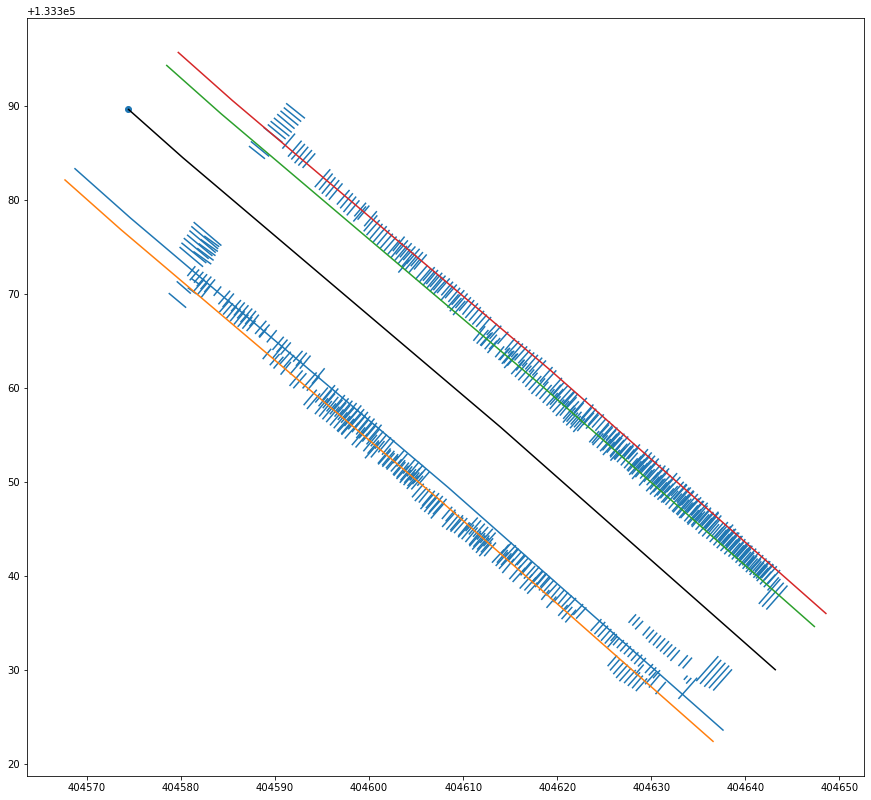

Road Split_FID = 13001 has 0 width measurement, skipped.
Error in idx: 13003 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 13007 has 0 width measurement, skipped.
Road Split_FID = 13009 has 0 width measurement, skipped.
Road Split_FID = 13012 has 0 width measurement, skipped.
Error in idx: 13019 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 13032 has 0 width measurement, skipped.
Road Split_FID = 13035 has 0 width measurement, skipped.
Road Split_FID = 13036 has 0 width measurement, skipped.
Road Split_FID = 13043 has 0 width measurement, skipped.
Road Split_FID = 13046 has 0 width measurement, skipped.
Road Split_FID = 13050 has 0 width measurement, skipped.
Road Split_FID = 13052 has 0 width measurement, skipped.
Road Split_FID = 13055 has 0 width measurement, skipped.
Error in idx: 13057 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 13062 has 0 width measurement, skipped.
Error in idx: 13065 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 13070 

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 13157 has 0 width measurement, skipped.
Road Split_FID = 13158 has 0 width measurement, skipped.
Road Split_FID = 13169 has 0 width measurement, skipped.
Road Split_FID = 13171 has 0 width measurement, skipped.
Road Split_FID = 13177 has 0 width measurement, skipped.
Road Split_FID = 13178 has 0 width measurement, skipped.
Road Split_FID = 13184 has 0 width measurement, skipped.
Road Split_FID = 13192 has 0 width measurement, skipped.
Road Split_FID = 13208 has 0 width measurement, skipped.
Road Split_FID = 13213 has 0 width measurement, skipped.
Road Split_FID = 13216 has 0 width measurement, skipped.
Road Split_FID = 13220 has 0 width measurement, skipped.
Road Split_FID = 13226 has 0 width measurement, skipped.
Road Split_FID = 13227 has 0 width measurement, skipped.
Road Split_FID = 13235 has 0 width measurement, skipped.
Error in idx: 13254 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 13260 has 0 width measurement, skipped.
Road Split_FID = 13262 has 0 

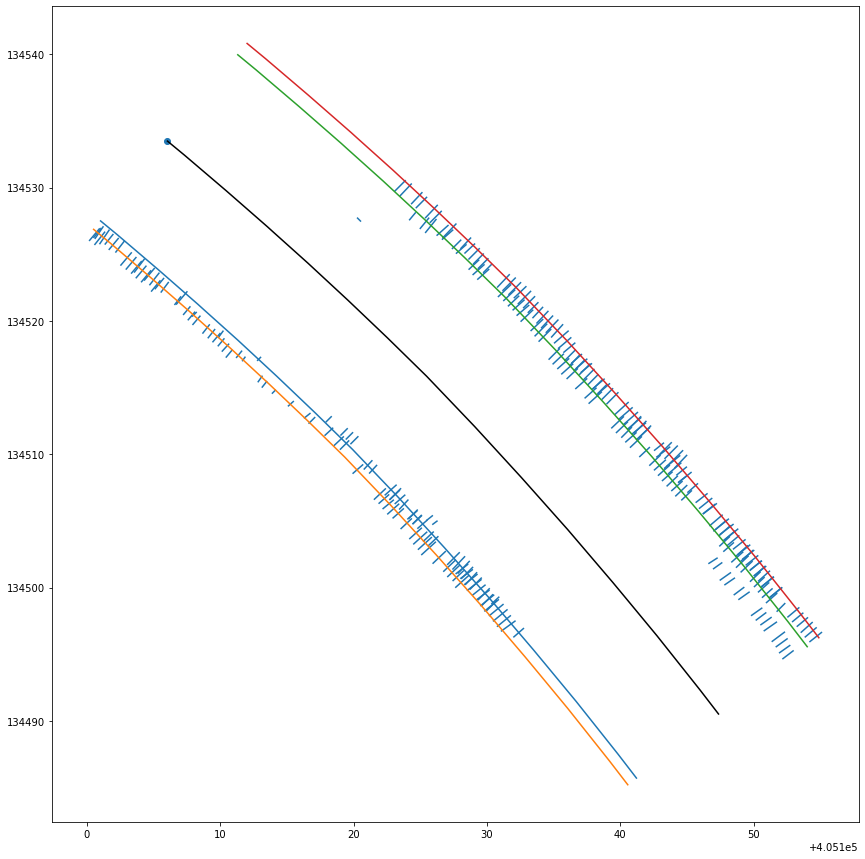

Road Split_FID = 13508 has 0 width measurement, skipped.
Road Split_FID = 13512 has 0 width measurement, skipped.
Road Split_FID = 13515 has 0 width measurement, skipped.
Road Split_FID = 13519 has 0 width measurement, skipped.
Error in idx: 13521 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 13522 has 0 width measurement, skipped.
Road Split_FID = 13523 has 0 width measurement, skipped.
Error in idx: 13526 n_samples=1 should be >= n_clusters=2.
Error in idx: 13530 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 13541 has 0 width measurement, skipped.
Error in idx: 13545 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 13546 has 0 width measurement, skipped.
Road Split_FID = 13547 has 0 width measurement, skipped.
Road Split_FID = 13553 has 0 width measurement, skipped.
Error in idx: 13558 n_samples=1 should be >= n_clusters=2.
Error in idx: 13563 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 13564 has 0 width measurement, skipped.
Road Split_FID = 13

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Road Split_FID = 13602 has 0 width measurement, skipped.
Road Split_FID = 13605 has 0 width measurement, skipped.
Error in idx: 13611 n_samples=1 should be >= n_clusters=2.
Error in idx: 13616 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 13625 has 0 width measurement, skipped.
Road Split_FID = 13635 has 0 width measurement, skipped.
Road Split_FID = 13636 has 0 width measurement, skipped.
Road Split_FID = 13642 has 0 width measurement, skipped.
Road Split_FID = 13646 has 0 width measurement, skipped.
Road Split_FID = 13653 has 0 width measurement, skipped.
Road Split_FID = 13659 has 0 width measurement, skipped.
Road Split_FID = 13670 has 0 width measurement, skipped.
Road Split_FID = 13672 has 0 width measurement, skipped.
Road Split_FID = 13691 has 0 width measurement, skipped.
Road Split_FID = 13693 has 0 width measurement, skipped.
Error in idx: 13704 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 13708 has 0 width measurement, skipped.
Road Split_FID = 13710 ha

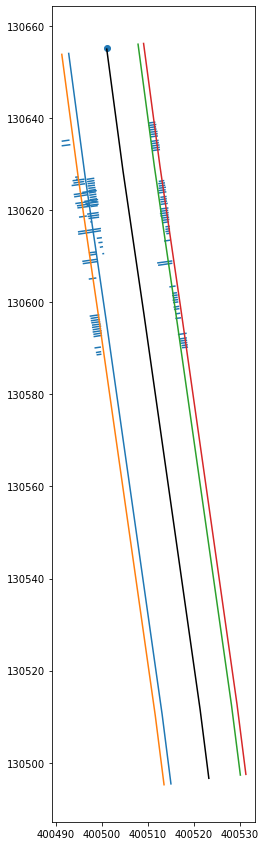

Road Split_FID = 14004 has 0 width measurement, skipped.
Road Split_FID = 14005 has 0 width measurement, skipped.
Road Split_FID = 14006 has 0 width measurement, skipped.
Road Split_FID = 14007 has 0 width measurement, skipped.
Road Split_FID = 14023 has 0 width measurement, skipped.
Road Split_FID = 14030 has 0 width measurement, skipped.
Road Split_FID = 14036 has 0 width measurement, skipped.
Road Split_FID = 14037 has 0 width measurement, skipped.
Road Split_FID = 14042 has 0 width measurement, skipped.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:145: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.


Error in idx: 14052 Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.
Error in idx: 14056 n_samples=1 should be >= n_clusters=2.
Error in idx: 14057 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 14068 has 0 width measurement, skipped.
Road Split_FID = 14072 has 0 width measurement, skipped.
Error in idx: 14073 n_samples=1 should be >= n_clusters=2.
Error in idx: 14076 n_samples=1 should be >= n_clusters=2.
Road Split_FID = 14086 has 0 width measurement, skipped.
Road Split_FID = 14092 has 0 width measurement, skipped.
Road Split_FID = 14094 has 0 width measurement, skipped.
Road Split_FID = 14112 has 0 width measurement, skipped.
Road Split_FID = 14117 has 0 width measurement, skipped.
Road Split_FID = 14120 has 0 width measurement, skipped.
Road Split_FID = 14131 has 0 width measurement, skipped.
Road Split_FID = 14133 has 0 width measurement, skipped.
Road Split_FID = 14136 has 0 width measurement, skipped.
Road Split_FID = 14137 has 0 width meas

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:270: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


Done.


In [84]:
import warnings
# warnings.filterwarnings("ignore")

def filter_measurements(raw_df):
    
    # 1) remove long measurements:
    min_cover_ratio = 0.95
    df = raw_df[raw_df["cover_rati"] > min_cover_ratio]

    # 2) remove short measurements:
    min_width = 0.4 # meters. Just keep widths > min_width            
    df = df[df["Shape_Leng"] > min_width]            

    # 3) remove near measurements:
    min_distance = 2
    df = df[df["NEAR_DIST"] > min_distance]    
    
    # 4) remove occluded measurements by vehicles:    
    df = df[df["is_touched"] == 0]
    
    return df

def parallel_centerline(gdf, gdf_road, id_column):
    parallels_geo = []
    parallels_df = pd.DataFrame(columns={id_column: str, 'width': float, "side": str})
    for idx, row in gdf_road.iterrows():
        #print("row:\n", row)
        try:

            FID = row[id_column]  
            raw_df = gdf[gdf["NEAR_FID"] == FID ]
            
            #print(f"Row # {idx}, {id_column}: {FID}")
            
            # filter measurements:
            
            df = filter_measurements(raw_df)
            
            # df = raw_df
            
            
            if len(df) == 0:
                print(f"Road {id_column} = {idx} has 0 width measurement, skipped." )
                continue
            
            
            #print("df:\n", df)

            # df_road = gdf_road[gdf_road[id_column] == FID]  
            # linestring = df_road['geometry'].iloc[0]
            # print("df_road:\n", df_road)
            
            linestring = row['geometry']
            df_road = gdf_road[gdf_road[id_column] == FID]
            
            
            if isinstance(linestring, shapely.geometry.multilinestring.MultiLineString):
                print(f"Row # {idx} is a multilinestring, converting to linestring.")
                # print("linestring:", linestring)
                coords_all = []
                
                for line in linestring:
                    coords_all += line.coords[:]
                #print(coords_all)
                
                linestring = shapely.geometry.linestring.LineString(coords_all)
                #print(type(linestring))
                #print(" linestring.xy[0][0]:", linestring.xy[0][0])
            

            distance_list = []
            width_list = []
            width_kmeans_list = []
            angle_list = []
            df_list = []
            
            

            left_index = 1
            right_index = 1 - left_index

            
            # print(" linestring.xy[0][0]:", linestring.xy[0][0])
            
            start_point =(linestring.xy[0][0],  linestring.xy[1][1])
            end_point =  (linestring.xy[0][-1], linestring.xy[1][-1])
            
            

            # road_direction = math.atan((-start_point[1] + end_point[1]) / (-start_point[0] + end_point[0]))
            road_direction = math.atan2((-start_point[1] + end_point[1]) , (-start_point[0] + end_point[0]))

            road_direction = math.degrees(road_direction)  % 360
            # print("road_direction:", road_direction)
            # print("road_direction - 90 (left_angle):", (road_direction - 90) % 360)
            #print("-start_point[1] + end_point[1]: ", -start_point[1] + end_point[1])
            #print("-start_point[0] + end_point[0]:", -start_point[0] + end_point[0])
            # direction = start_point[1] - end_point[1]
            
            
            mean_angle = df['NEAR_ANGLE'].mean()
            
            df1 =  df[df['NEAR_ANGLE'] > mean_angle]
            df2 =  df[df['NEAR_ANGLE'] < mean_angle]
            

            angle1 = df1['NEAR_ANGLE'].median() % 360
            angle2 = df2['NEAR_ANGLE'].median() % 360
            angle_list.append(angle1)
            angle_list.append(angle2)
            
            #print("angle1, angle2:", angle1, angle2)


            # left_index = find_smallest_angle((road_direction - 90) % 360, angle_list)
            left_index = find_smallest_angle((road_direction - 90) % 360, angle_list)
            right_index = 1 - left_index

            # print("left_index, right_index:", left_index, right_index)
            # print("left_angle, right_angle:", angle_list[left_index], angle_list[right_index])

            
            df_list.append(df1)
            df_list.append(df2)

            #dis1 = df1['NEAR_DIST'].mean()
            #dis2 = df2['NEAR_DIST'].mean()
            dis1 = df1['NEAR_DIST'].median()
            dis2 = df2['NEAR_DIST'].median()
            
            distance_list.append(dis1)
            distance_list.append(dis2)


            #width1 = df[df['NEAR_ANGLE'] > mean_angle]['Shape_Leng'].quantile(0.2)
            #width2 = df[df['NEAR_ANGLE'] < mean_angle]['Shape_Leng'].quantile(0.2)
            #width1 = df1[df1['Shape_Leng'] > min_width]['Shape_Leng'].quantile(0.2)
            #width2 = df2[df2['Shape_Leng'] > min_width]['Shape_Leng'].quantile(0.2)  
            
            width1 = df1['Shape_Leng'].quantile(0.2)
            width2 = df2['Shape_Leng'].quantile(0.2)  
            
            # use Kmeans
            width_list1 = np.array(df1['Shape_Leng'] ).reshape(-1, 1)
            kmean1 = KMeans(n_clusters=2, random_state=0, n_init=100, max_iter=500).fit(width_list1)
            # print("kmeans 1 centers, n_iter:", kmean1.cluster_centers_, kmean1.n_iter_)
            
            # df1.loc[:, "kmean_label"] = kmean1.labels_
            # print("kmeans 1 averages:", df1.groupby(["kmean_label"], as_index=False).mean()['Shape_Leng'])
            
            width_list2 = np.array(df2['Shape_Leng'] ).reshape(-1, 1)
            kmean2 = KMeans(n_clusters=2, random_state=0, n_init=100, max_iter=500).fit(width_list2)
            # print("kmeans 2 centers, n_iter:", kmean2.cluster_centers_, kmean2.n_iter_)
            # df2.loc[:, "kmean_label"] = kmean2.labels_
            # print("kmeans 2 averages:", df2.groupby(["kmean_label"], as_index=False).mean()['Shape_Leng'])
            
            width_list.append(width1)
            width_list.append(width2)
            
            width_kmeans_list.append(kmean1.cluster_centers_.min())
            width_kmeans_list.append(kmean2.cluster_centers_.min())
            
            


            # print("angle1, angle2: ", angle1, angle2)
            # print("dis1, dis2: ", dis1, dis2)
            # print("width1, width2: ", width1, width2)

            df_left = df_list[left_index]
            df_right = df_list[right_index]
            
            if idx % 500 == 0:
                print(f"Processing row #: ", idx)
                print(f"Before filtering {len(raw_df)} rows, after filtering {len(df)} rows.")
                print("road_direction:", road_direction)
                print("left, right angle:", angle_list[left_index], angle_list[right_index])
                #print(f"{width_list[left_index]:.3f}")
                #print(f"{width_list[left_index]:.3f}")
                print("width_kmeans_list:", width_kmeans_list)
                
                

            minimum_measurement_cnt = 5

            if len(df_left) > minimum_measurement_cnt:
                left_line = linestring.parallel_offset(distance=distance_list[left_index] , side="left", join_style=2)
                left_line2 = linestring.parallel_offset(distance=distance_list[left_index] + width_list[left_index], side="left", join_style=2)
                left_line_center = linestring.parallel_offset(distance=distance_list[left_index]  + width_list[left_index]/2, \
                                                              side="left", join_style=2)
                parallels_geo.append(left_line)
                parallels_geo.append(left_line2)
                parallels_geo.append(left_line_center)
                
                df_line = {id_column: FID, "width": f"{width_list[left_index]:.3f}", 'side':"left_near", \
                          "width_kmeans": f"{width_kmeans_list[left_index]:.3f}",}
                parallels_df = parallels_df.append(df_line, ignore_index=True)
                
                df_line = {id_column: FID, "width": f"{width_list[left_index]:.3f}", 'side':"left_far", \
                          "width_kmeans": f"{width_kmeans_list[left_index]:.3f}",}
                parallels_df = parallels_df.append(df_line, ignore_index=True)
                
                df_line = {id_column: FID, "width": f"{width_list[left_index]:.3f}", 'side':"left_center", \
                          "width_kmeans": f"{width_kmeans_list[left_index]:.3f}",}
                parallels_df = parallels_df.append(df_line, ignore_index=True)
                
                


            if len(df_right)  > minimum_measurement_cnt:
                right_line = linestring.parallel_offset(distance=distance_list[right_index] , side="right", join_style=2)             
                right_line2 = linestring.parallel_offset(distance=distance_list[right_index] + width_list[right_index], side="right", join_style=2)
                right_line_center = linestring.parallel_offset(distance=distance_list[right_index] + width_list[right_index]/2, \
                                                               side="right", join_style=2)

                
                
                parallels_geo.append(right_line)
                parallels_geo.append(right_line2)
                parallels_geo.append(right_line_center)
                
                df_line = {id_column: FID, "width": f"{width_list[right_index]:.3f}", 'side':"right_near", \
                          "width_kmeans": f"{width_kmeans_list[right_index]:.3f}",}
                parallels_df = parallels_df.append(df_line, ignore_index=True)
                
                df_line = {id_column: FID, "width": f"{width_list[right_index]:.3f}", 'side':"right_far", \
                          "width_kmeans": f"{width_kmeans_list[right_index]:.3f}",}
                parallels_df = parallels_df.append(df_line, ignore_index=True)
                
                df_line = {id_column: FID, "width": f"{width_list[right_index]:.3f}", 'side':"right_center", \
                          "width_kmeans": f"{width_kmeans_list[right_index]:.3f}",}
                parallels_df = parallels_df.append(df_line, ignore_index=True)

                
                
            # is_draw = False
            is_draw = True

            if (is_draw) and (idx % 500 == 0):
                figure, ax = plt.subplots(figsize=(15, 15))

                ax = df.plot(ax=ax)
                df_road.plot(ax=ax, color='black')
                
                if len(df_right)  > minimum_measurement_cnt:
                    ax.plot(right_line.xy[0], right_line.xy[1])
                    ax.plot(right_line2.xy[0], right_line2.xy[1])
                    
                if len(df_right)  > minimum_measurement_cnt:    
                    ax.plot(left_line.xy[0], left_line.xy[1])                
                    ax.plot(left_line2.xy[0], left_line2.xy[1])

                ax.scatter(linestring.xy[0][0], linestring.xy[1][0]) # start points
                # ax.scatter(linestring.xy[0][-1], linestring.xy[1][-1])

                #print("start_point:", start_point)
                #print("direction:", direction)

                plt.axis("scaled")
                plt.show()
        except Exception as e:
            print("Error in idx:", idx, e)
            continue
    # print(parallels_df)
    is_save = False
    is_save = True
    if is_save:
        parallel_gdf = gpd.GeoDataFrame(parallels_df, geometry=parallels_geo)
        if len(parallel_gdf) > 0:
            parallel_gdf.to_file(r"E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\sidewalk_network_20210612.shp")
    print("Done.")

test_FID = 63
#parallel_centerline(gdf_widths, gdf_road[test_FID:test_FID+1].reset_index(), id_column="Split_FID")
parallel_centerline(gdf_widths, gdf_road[:], id_column="Split_FID")

In [60]:
gdf_road[test_FID:test_FID+1]["Split_FID"]  

0    0
Name: Split_FID, dtype: int64

In [4]:
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
array([1, 1, 1, 0, 0, 0], dtype=int32)
kmeans.predict([[0, 0], [12, 3]])
array([1, 0], dtype=int32)
kmeans.cluster_centers_
array([[10.,  2.],
       [ 1.,  2.]])

In [416]:
id_column = 'FID_0'
gdf_road[id_column] 

0            0
1            1
2            2
3            3
4            4
         ...  
13744    13744
13745    13745
13746    13746
13747    13747
13748    13748
Name: FID_0, Length: 13749, dtype: int64

angel1, angel2:  89.8258505256 -90.2974581408
dis1, dis2:  10.44788915317336 14.911290409333333
width1, width2:  3.800263113106 1.75


(398554.18512324226, 398689.2997033254, 135508.23644033747, 135545.5134076012)

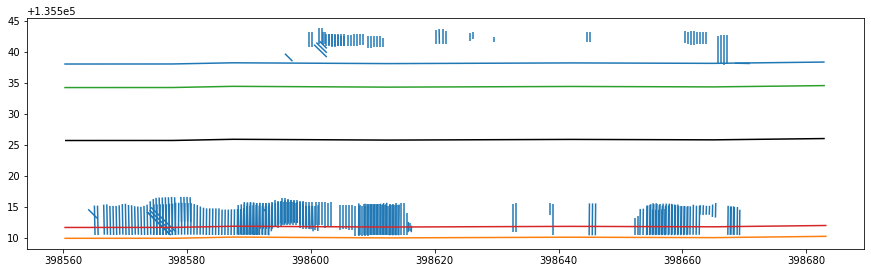

In [63]:
FID = 0


df = gdf[gdf["NEAR_FID"] == FID]
df = df[df["Shape_Leng"] >  0.5]

mean_angle = df['NEAR_ANGLE'].mean()

df_road = gdf_road[gdf_road["FID_0"] == FID]
linestring = df_road['geometry'].iloc[0]

figure, ax = plt.subplots(figsize=(15, 15))

df.plot(ax=ax)
df_road.plot(ax=ax, color='black')

dis1 = df[df['NEAR_ANGLE'] > mean_angle]['NEAR_DIST'].mean()
dis2 = df[df['NEAR_ANGLE'] < mean_angle]['NEAR_DIST'].mean()


angel1 = df[df['NEAR_ANGLE'] > mean_angle]['NEAR_ANGLE'].median()
angel2 = df[df['NEAR_ANGLE'] < mean_angle]['NEAR_ANGLE'].median()

width1 = df[df['NEAR_ANGLE'] > mean_angle]['Shape_Leng'].quantile(0.2)
width2 = df[df['NEAR_ANGLE'] < mean_angle]['Shape_Leng'].quantile(0.2)

print("angel1, angel2: ", angel1, angel2)
print("dis1, dis2: ", dis1, dis2)
print("width1, width2: ", width1, width2)

left_line = linestring.parallel_offset(distance=dis2 + width2/2, side="left", join_style=2)
right_line = linestring.parallel_offset(distance=dis1 + width1/2, side="right", join_style=2)

ax.plot(right_line.xy[0], right_line.xy[1])
ax.plot(left_line.xy[0], left_line.xy[1])


left_line = linestring.parallel_offset(distance=dis2 - width2/2, side="left", join_style=2)
right_line = linestring.parallel_offset(distance=dis1 - width1/2, side="right", join_style=2)

ax.plot(right_line.xy[0], right_line.xy[1])
ax.plot(left_line.xy[0], left_line.xy[1])


plt.axis("scaled")

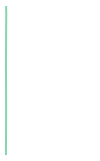

In [251]:
linestring

In [252]:

# plt.plot(left_line.xy[0], left_line.xy[1], ax=ax)
# plt.axis("scaled")
plt.show()

In [98]:
ax.plot(right_line.xy[0], right_line.xy[1])

AttributeError: 'list' object has no attribute 'plot'

In [411]:
gdf_road

,OBJECTID,ROUTEID,FROMMEASUR,TOMEASURE,ROUTENAME,ROADTYPE,BLOCKKEY,TOTALTRAVE,TOTALPARKI,TOTALRAISE,...,RIGHTTUR_1,TOTALBIKEL,TOTALBIK_1,RPPDIRECTI,RPPSIDE,SLOWSTREET,SHAPELEN,SHAPE_1,FID_0,geometry
0,68801,14047972,530.475586,653.120911,INDEPENDENCE AVE SW,1,17645a0bbbce8d16873b6d4134041c21,6,2,0,...,0,0,0,None,None,None,0,None,0,"LINESTRING Z (398682.974 135526.034 0.000, 398..."
1,68802,13068362,0.000000,9.763900,OXON RUN PL SE,1,3ca7098f9b049317d7eae7479de149b5,2,0,0,...,0,0,0,None,None,None,0,None,1,"LINESTRING Z (404019.743 132283.534 0.000, 404..."
2,68803,13012092,2500.530518,2834.991699,B ST SE,1,ba09d4e62918d587c013bf70f5f4aca2,2,2,0,...,0,0,0,None,None,None,0,None,2,"LINESTRING Z (406678.883 135290.704 0.000, 406..."
3,68804,13059452,784.465881,982.860291,MARTIN LUTHER KING JR AVE SE,1,40894de5be69af4b9a3517bb2f29d637,4,0,0,...,0,0,0,None,None,None,0,None,3,"LINESTRING Z (400672.862 132772.834 0.000, 400..."
4,68805,12094482A,0.000000,78.573998,WRIGHT TER NE,1,509f3aef181ebe1834a002b25f561b12,2,2,0,...,0,0,0,None,None,None,0,None,4,"LINESTRING Z (403862.799 139511.733 0.000, 403..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13744,82547,14093362,180.891495,366.575409,WICK DR SW,1,afbb98ffd7f46aee54ee6a0d4dd0268a,2,0,0,...,0,0,0,None,None,None,0,None,13744,"LINESTRING Z (398989.152 132172.573 0.000, 398..."
13745,82548,13000302,1017.278870,1066.685303,3RD ST SE,1,393848a51372b0cb98765d29aaf82a4c,2,0,0,...,0,0,0,3,B,"Local street, no buses; should install contraf...",0,None,13745,"LINESTRING Z (399822.008 134757.538 0.000, 399..."
13746,82549,13004902,314.823486,391.195496,49TH ST SE,1,857a397acc0f659d3693b5b998a38b34,2,2,0,...,0,0,0,None,None,NEW Connect C up to Brooks,0,None,13746,"LINESTRING Z (405841.443 135461.374 0.000, 405..."
13747,82550,13048752,330.822113,415.402313,IRVING ST SE,1,10f976e835a275aaa157aa31a0fc3e09,2,2,0,...,0,0,0,None,None,None,0,None,13747,"LINESTRING Z (402412.333 131690.783 0.000, 402..."


In [187]:
df['NEAR_DIST'].mean()

7.413687329507999

In [48]:
mean_angle = df['NEAR_ANGLE'].mean()
mean_angle

10.417865198694358

# Remove the sidewalk parallels lines on roadway

In [165]:
import geopandas as gpd

In [85]:
shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\network_0612_split.shp'
gdf = gpd.read_file(shp_file)
gdf.head(1)

,Split_FID,width,side,width_kmea,sw_FID,sub_length,geometry
0,1,3.900,left_center,3.716,2,11.00494,"LINESTRING (398683.119 135513.596, 398672.115 ..."


In [86]:
sw_FIDs = gdf['sw_FID'].unique()
len(sw_FIDs)

24497

In [87]:
pip install tqdm

In [88]:
from tqdm import tqdm
for idx, FID in tqdm(enumerate(sw_FIDs[:])):
    if idx % 100 == 0:
        print("Processing FID:", FID)
    gdf1 = gdf[gdf['sw_FID'] == FID].copy()
    gdf1['length_rank'] = gdf1['sub_length'].rank(ascending=False, method='first')
    gdf.loc[gdf1.index, 'length_rank'] = gdf1['length_rank']
    


1it [00:00,  8.06it/s]

Processing: 2


101it [00:06, 14.73it/s]

Processing: 302


201it [00:13, 15.28it/s]

Processing: 602


301it [00:19, 15.07it/s]

Processing: 902


403it [00:26, 15.41it/s]

Processing: 1202


503it [00:32, 15.87it/s]

Processing: 1502


601it [00:39,  9.65it/s]

Processing: 1802


702it [00:51,  7.91it/s]

Processing: 2102


801it [01:03,  7.70it/s]

Processing: 2402


901it [01:15,  7.84it/s]

Processing: 2702


1001it [01:27,  7.93it/s]

Processing: 3002


1102it [01:38,  8.61it/s]

Processing: 3302


1202it [01:49, 10.57it/s]

Processing: 3602


1302it [01:58, 11.05it/s]

Processing: 3902


1402it [02:07, 10.87it/s]

Processing: 4202


1502it [02:16, 11.32it/s]

Processing: 4502


1602it [02:24, 11.50it/s]

Processing: 4802


1702it [02:33, 11.67it/s]

Processing: 5102


1802it [02:41, 12.40it/s]

Processing: 5402


1902it [02:48, 13.07it/s]

Processing: 5702


2002it [02:56, 13.21it/s]

Processing: 6002


2102it [03:03, 13.65it/s]

Processing: 6302


2202it [03:10, 14.48it/s]

Processing: 6602


2302it [03:17, 15.15it/s]

Processing: 6902


2402it [03:23, 16.90it/s]

Processing: 7202


2502it [03:29, 17.00it/s]

Processing: 7502


2604it [03:35, 17.12it/s]

Processing: 7802


2702it [03:40, 16.71it/s]

Processing: 8102


2802it [03:46, 16.86it/s]

Processing: 8402


2904it [03:52, 16.23it/s]

Processing: 8702


3002it [03:58, 16.16it/s]

Processing: 9002


3102it [04:04, 14.97it/s]

Processing: 9302


3202it [04:10, 16.81it/s]

Processing: 9602


3302it [04:16, 16.49it/s]

Processing: 9902


3402it [04:22, 16.80it/s]

Processing: 10202


3502it [04:28, 17.18it/s]

Processing: 10502


3604it [04:34, 16.90it/s]

Processing: 10802


3702it [04:40, 16.37it/s]

Processing: 11102


3804it [04:46, 16.90it/s]

Processing: 11402


3904it [04:51, 17.17it/s]

Processing: 11702


4002it [04:57, 16.73it/s]

Processing: 12002


4102it [05:03, 16.31it/s]

Processing: 12302


4202it [05:09, 16.15it/s]

Processing: 12602


4302it [05:15, 16.66it/s]

Processing: 12902


4404it [05:21, 17.18it/s]

Processing: 13202


4504it [05:27, 16.91it/s]

Processing: 13502


4602it [05:32, 16.71it/s]

Processing: 13802


4704it [05:38, 17.13it/s]

Processing: 14102


4802it [05:44, 16.51it/s]

Processing: 14402


4902it [05:50, 16.57it/s]

Processing: 14702


5004it [05:56, 16.90it/s]

Processing: 15002


5104it [06:02, 17.14it/s]

Processing: 15302


5202it [06:07, 16.74it/s]

Processing: 15602


5302it [06:13, 16.56it/s]

Processing: 15902


5404it [06:19, 16.97it/s]

Processing: 16202


5504it [06:25, 16.95it/s]

Processing: 16502


5602it [06:31, 17.07it/s]

Processing: 16802


5704it [06:37, 17.04it/s]

Processing: 17102


5802it [06:43, 16.84it/s]

Processing: 17402


5902it [06:48, 16.71it/s]

Processing: 17702


6002it [06:54, 16.89it/s]

Processing: 18002


6102it [07:00, 16.61it/s]

Processing: 18302


6202it [07:06, 16.42it/s]

Processing: 18602


6302it [07:12, 17.22it/s]

Processing: 18902


6402it [07:17, 17.02it/s]

Processing: 19202


6502it [07:23, 16.58it/s]

Processing: 19502


6602it [07:29, 16.59it/s]

Processing: 19802


6702it [07:35, 16.72it/s]

Processing: 20102


6802it [07:41, 16.77it/s]

Processing: 20402


6904it [07:47, 16.93it/s]

Processing: 20702


7002it [07:52, 16.69it/s]

Processing: 21002


7102it [07:58, 16.72it/s]

Processing: 21302


7204it [08:04, 16.86it/s]

Processing: 21602


7302it [08:10, 16.43it/s]

Processing: 21902


7404it [08:16, 16.83it/s]

Processing: 22202


7504it [08:22, 16.97it/s]

Processing: 22502


7602it [08:28, 16.31it/s]

Processing: 22802


7702it [08:34, 16.86it/s]

Processing: 23102


7802it [08:39, 16.59it/s]

Processing: 23402


7902it [08:45, 16.71it/s]

Processing: 23702


8004it [08:51, 17.08it/s]

Processing: 24002


8102it [08:57, 15.68it/s]

Processing: 24302


8202it [09:03, 16.94it/s]

Processing: 24602


8302it [09:09, 16.51it/s]

Processing: 24902


8404it [09:15, 17.08it/s]

Processing: 25202


8502it [09:21, 16.59it/s]

Processing: 25502


8604it [09:27, 16.85it/s]

Processing: 25802


8704it [09:33, 16.99it/s]

Processing: 26102


8802it [09:38, 16.42it/s]

Processing: 26402


8902it [09:44, 16.43it/s]

Processing: 26702


9002it [09:50, 16.68it/s]

Processing: 27002


9102it [09:56, 16.88it/s]

Processing: 27302


9202it [10:02, 16.67it/s]

Processing: 27602


9304it [10:08, 16.69it/s]

Processing: 27902


9402it [10:14, 16.77it/s]

Processing: 28202


9502it [10:19, 16.92it/s]

Processing: 28502


9604it [10:25, 16.97it/s]

Processing: 28802


9704it [10:31, 17.06it/s]

Processing: 29102


9802it [10:37, 17.52it/s]

Processing: 29402


9902it [10:42, 16.74it/s]

Processing: 29702


10004it [10:48, 16.81it/s]

Processing: 30002


10102it [10:54, 16.17it/s]

Processing: 30302


10202it [11:00, 16.75it/s]

Processing: 30602


10302it [11:06, 16.87it/s]

Processing: 30902


10402it [11:12, 16.72it/s]

Processing: 31202


10502it [11:18, 15.78it/s]

Processing: 31502


10602it [11:24, 16.45it/s]

Processing: 31802


10702it [11:30, 16.46it/s]

Processing: 32102


10802it [11:36, 16.67it/s]

Processing: 32402


10902it [11:41, 16.64it/s]

Processing: 32702


11004it [11:47, 16.87it/s]

Processing: 33002


11102it [11:53, 16.48it/s]

Processing: 33302


11202it [11:59, 16.45it/s]

Processing: 33602


11304it [12:05, 16.72it/s]

Processing: 33902


11402it [12:11, 16.58it/s]

Processing: 34202


11502it [12:17, 16.70it/s]

Processing: 34502


11604it [12:23, 16.91it/s]

Processing: 34802


11702it [12:29, 16.36it/s]

Processing: 35102


11804it [12:35, 16.95it/s]

Processing: 35402


11902it [12:40, 16.36it/s]

Processing: 35702


12002it [12:46, 16.63it/s]

Processing: 36002


12102it [12:52, 16.71it/s]

Processing: 36302


12202it [12:58, 16.44it/s]

Processing: 36602


12304it [13:04, 16.70it/s]

Processing: 36902


12402it [13:10, 16.62it/s]

Processing: 37202


12502it [13:15, 16.50it/s]

Processing: 37502


12602it [13:21, 16.42it/s]

Processing: 37802


12702it [13:27, 16.64it/s]

Processing: 38102


12804it [13:33, 17.14it/s]

Processing: 38402


12904it [13:39, 16.94it/s]

Processing: 38702


13002it [13:45, 16.85it/s]

Processing: 39002


13104it [13:51, 16.93it/s]

Processing: 39302


13204it [13:56, 16.98it/s]

Processing: 39602


13302it [14:02, 16.42it/s]

Processing: 39902


13402it [14:08, 17.00it/s]

Processing: 40202


13504it [14:14, 17.29it/s]

Processing: 40502


13602it [14:20, 16.53it/s]

Processing: 40802


13702it [14:26, 16.23it/s]

Processing: 41102


13802it [14:31, 16.90it/s]

Processing: 41402


13904it [14:37, 16.73it/s]

Processing: 41702


14002it [14:43, 16.45it/s]

Processing: 42002


14102it [14:49, 16.82it/s]

Processing: 42302


14204it [14:55, 16.73it/s]

Processing: 42602


14304it [15:01, 17.18it/s]

Processing: 42902


14402it [15:07, 15.65it/s]

Processing: 43202


14502it [15:13, 16.39it/s]

Processing: 43502


14604it [15:19, 16.95it/s]

Processing: 43802


14704it [15:25, 16.72it/s]

Processing: 44102


14802it [15:31, 16.39it/s]

Processing: 44402


14902it [15:36, 16.45it/s]

Processing: 44702


15004it [15:42, 16.62it/s]

Processing: 45002


15104it [15:48, 17.12it/s]

Processing: 45302


15202it [15:54, 16.74it/s]

Processing: 45602


15304it [16:00, 16.83it/s]

Processing: 45902


15404it [16:06, 16.64it/s]

Processing: 46202


15504it [16:12, 16.65it/s]

Processing: 46502


15602it [16:18, 16.49it/s]

Processing: 46802


15704it [16:24, 16.98it/s]

Processing: 47102


15802it [16:29, 16.46it/s]

Processing: 47402


15904it [16:35, 17.03it/s]

Processing: 47702


16002it [16:41, 16.63it/s]

Processing: 48002


16104it [16:47, 17.18it/s]

Processing: 48302


16204it [16:53, 16.77it/s]

Processing: 48602


16302it [16:59, 16.32it/s]

Processing: 48902


16404it [17:05, 16.75it/s]

Processing: 49202


16502it [17:10, 16.83it/s]

Processing: 49502


16602it [17:16, 16.48it/s]

Processing: 49802


16702it [17:22, 16.88it/s]

Processing: 50102


16802it [17:28, 16.82it/s]

Processing: 50402


16902it [17:34, 16.30it/s]

Processing: 50702


17002it [17:40, 17.08it/s]

Processing: 51002


17104it [17:46, 16.75it/s]

Processing: 51302


17202it [17:51, 16.75it/s]

Processing: 51602


17302it [17:57, 16.55it/s]

Processing: 51902


17404it [18:03, 17.07it/s]

Processing: 52202


17504it [18:09, 16.78it/s]

Processing: 52502


17602it [18:15, 17.06it/s]

Processing: 52802


17704it [18:21, 17.09it/s]

Processing: 53102


17802it [18:27, 16.53it/s]

Processing: 53402


17904it [18:33, 16.36it/s]

Processing: 53702


18002it [18:38, 16.58it/s]

Processing: 54002


18104it [18:44, 17.02it/s]

Processing: 54302


18202it [18:50, 16.61it/s]

Processing: 54602


18302it [18:56, 16.74it/s]

Processing: 54902


18402it [19:02, 16.84it/s]

Processing: 55202


18504it [19:08, 16.64it/s]

Processing: 55502


18604it [19:14, 17.02it/s]

Processing: 55802


18704it [19:20, 16.45it/s]

Processing: 56102


18804it [19:25, 17.25it/s]

Processing: 56402


18904it [19:31, 16.65it/s]

Processing: 56702


19002it [19:37, 16.62it/s]

Processing: 57002


19102it [19:43, 16.92it/s]

Processing: 57302


19204it [19:49, 16.96it/s]

Processing: 57602


19304it [19:55, 16.88it/s]

Processing: 57902


19402it [20:01, 16.82it/s]

Processing: 58202


19504it [20:07, 16.54it/s]

Processing: 58502


19602it [20:12, 16.93it/s]

Processing: 58802


19704it [20:18, 16.78it/s]

Processing: 59102


19804it [20:24, 16.68it/s]

Processing: 59402


19902it [20:30, 16.79it/s]

Processing: 59702


20002it [20:36, 16.89it/s]

Processing: 60002


20102it [20:41, 16.88it/s]

Processing: 60302


20204it [20:47, 17.01it/s]

Processing: 60602


20302it [20:53, 16.93it/s]

Processing: 60902


20402it [20:59, 16.24it/s]

Processing: 61202


20502it [21:05, 17.30it/s]

Processing: 61502


20602it [21:11, 16.74it/s]

Processing: 61802


20704it [21:17, 16.97it/s]

Processing: 62102


20802it [21:23, 16.07it/s]

Processing: 62402


20904it [21:29, 16.48it/s]

Processing: 62702


21002it [21:34, 16.64it/s]

Processing: 63002


21102it [21:41, 16.49it/s]

Processing: 63302


21202it [21:46, 16.98it/s]

Processing: 63602


21302it [21:52, 16.93it/s]

Processing: 63902


21404it [21:58, 16.79it/s]

Processing: 64202


21502it [22:04, 16.30it/s]

Processing: 64502


21604it [22:10, 16.91it/s]

Processing: 64802


21704it [22:16, 16.81it/s]

Processing: 65102


21802it [22:21, 16.82it/s]

Processing: 65402


21904it [22:27, 17.26it/s]

Processing: 65702


22002it [22:33, 16.95it/s]

Processing: 66002


22102it [22:39, 16.72it/s]

Processing: 66302


22202it [22:45, 16.77it/s]

Processing: 66602


22302it [22:51, 16.77it/s]

Processing: 66902


22402it [22:57, 15.66it/s]

Processing: 67202


22502it [23:02, 16.83it/s]

Processing: 67502


22604it [23:08, 16.90it/s]

Processing: 67802


22704it [23:14, 17.03it/s]

Processing: 68102


22804it [23:20, 16.97it/s]

Processing: 68402


22902it [23:26, 16.69it/s]

Processing: 68702


23004it [23:32, 16.90it/s]

Processing: 69002


23102it [23:38, 16.24it/s]

Processing: 69302


23202it [23:43, 17.03it/s]

Processing: 69602


23302it [23:49, 16.77it/s]

Processing: 69902


23404it [23:55, 16.61it/s]

Processing: 70202


23502it [24:01, 16.97it/s]

Processing: 70502


23602it [24:07, 16.62it/s]

Processing: 70802


23702it [24:13, 16.55it/s]

Processing: 71102


23802it [24:19, 17.24it/s]

Processing: 71402


23904it [24:24, 17.27it/s]

Processing: 71702


24004it [24:30, 17.27it/s]

Processing: 72002


24104it [24:36, 17.63it/s]

Processing: 72302


24202it [24:42, 16.23it/s]

Processing: 72602


24304it [24:48, 17.23it/s]

Processing: 72902


24404it [24:53, 17.14it/s]

Processing: 73202


24497it [24:59, 16.34it/s]


In [89]:
new_shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\network_split_rank0613.shp'

gdf.to_file(new_shp_file)

C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  This is separate from the ipykernel package so we can avoid doing imports until


# Calculate width for sidewalk network 

In [79]:
widths_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\width_measurements_raw2.gpkg'
gdf_widths = gpd.read_file(widths_file, layer=r'no_walkway_no_short_near')

gdf_widths

,panoId,contour_nu,center_x,center_y,length,start_x,start_y,end_x,end_y,cover_rati,is_touched,NEAR_FID,NEAR_DIST,NEAR_X,NEAR_Y,NEAR_ANGLE,geometry
0,5HuzW5GILysVFfSeGSERag,1,391507.06250,138938.015625,1.50,391506.65625,138937.390625,391507.50000,138938.640625,0.990,0,6459,0.000000,391507.282508,138938.323040,0.000000,"MULTILINESTRING ((391507.496 138938.637, 39150..."
1,5HuzW5GILysVFfSeGSERag,1,391507.43750,138937.640625,1.50,391507.03125,138936.984375,391507.84375,138938.281250,0.987,0,6459,0.000000,391507.683202,138938.022454,0.000000,"MULTILINESTRING ((391507.846 138938.287, 39150..."
2,5HuzW5GILysVFfSeGSERag,1,391507.90625,138937.390625,1.65,391507.43750,138936.687500,391508.34375,138938.093750,0.925,0,6459,0.000000,391508.102366,138937.708013,0.000000,"MULTILINESTRING ((391508.346 138938.087, 39150..."
3,5HuzW5GILysVFfSeGSERag,1,391508.31250,138937.156250,1.35,391507.93750,138936.593750,391508.68750,138937.734375,0.911,0,6459,0.000000,391508.488268,138937.418478,0.000000,"MULTILINESTRING ((391508.696 138937.737, 39150..."
4,5HuzW5GILysVFfSeGSERag,1,391509.56250,138936.312500,1.70,391509.09375,138935.593750,391510.03125,138937.031250,0.952,0,6459,0.000000,391509.788749,138936.644353,0.000000,"MULTILINESTRING ((391510.046 138937.037, 39150..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7810769,__zUXvAsCfoodsgxWHyTlQ,8,395125.03125,138085.578125,3.50,395125.00000,138087.328125,395125.06250,138083.828125,0.951,0,40612,0.000000,395125.026155,138086.056127,0.000000,"MULTILINESTRING ((395125.058 138083.827, 39512..."
7810770,__zUXvAsCfoodsgxWHyTlQ,8,395122.56250,138085.078125,2.50,395122.56250,138086.328125,395122.56250,138083.828125,0.919,0,40612,0.000000,395122.558000,138086.029388,0.000000,"MULTILINESTRING ((395122.558 138083.827, 39512..."
7810771,__zUXvAsCfoodsgxWHyTlQ,8,395122.06250,138084.828125,2.00,395122.06250,138085.828125,395122.06250,138083.828125,0.993,0,40612,0.196959,395122.055866,138086.023948,90.620701,"MULTILINESTRING ((395122.058 138083.827, 39512..."
7810772,__zUXvAsCfoodsgxWHyTlQ,8,395121.56250,138084.796875,1.95,395121.56250,138085.781250,395121.56250,138083.828125,0.992,0,40612,0.241540,395121.555383,138086.018526,90.620701,"MULTILINESTRING ((395121.558 138083.827, 39512..."


In [86]:
gdf_widths['Shape_Leng'] = gdf_widths['length']

In [74]:
sidewalk_network_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\netwrok_split_rank0613_3m_diss_50m.shp'

gdf_road = gpd.read_file(sidewalk_network_file)
gdf_road.head(1)

,sw_FID,Shape_Leng,FID_0,geometry
0,2.0,50.000028,1,"LINESTRING (398672.115 135513.467, 398672.107 ..."


In [75]:
def degree_difference(angle1, angle2, apex=True):
    diff = abs(angle1 - angle2) % 360
    if apex:
        if diff > 180:
            diff = 360 - diff
    #print(diff)
    return diff

def find_smallest_angle(angle, angle_list):
    diff = [degree_difference(angle, a) for a in angle_list]
    return np.argmin(diff)
    
find_smallest_angle((90 - 90)%360, [179, 359])

1

Row # 0, FID_0: 38378
Processing row #:  0
Before filtering 9 rows, after filtering 3 rows.
road_direction: 0.0
width_kmeans: 0.8500000238418579
Processing row #:  0
Before filtering 9 rows, after filtering 3 rows.
road_direction: 0.0
new line: {'FID_0': 38378, 'width_median': 1.100000023841858, 'width_mean': 1.1833333571751912, 'width_kmean': 0.8500000238418579, 'width_quantile02': 0.8000000238418579, 'width_min': 0.8000000238418579, 'wid_count': 3, 'count_raw': 9, 'length': 2.40480000526}


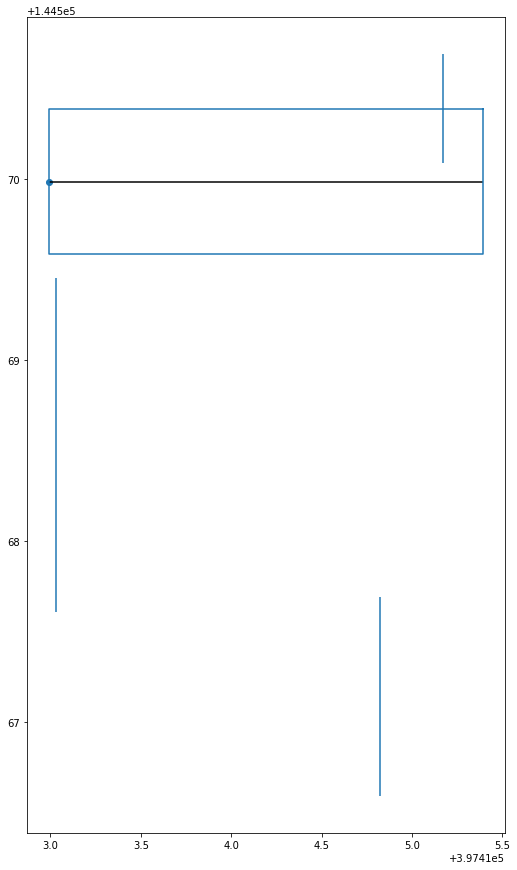

Done.


C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:165: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
C:\ProgramData\Anaconda3\envs\gdal_env\lib\site-packages\ipykernel_launcher.py:169: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


In [181]:
import warnings
# warnings.filterwarnings("ignore")

def filter_measurements(raw_df):
    
    # 1) remove long measurements:
    min_cover_ratio = 0.95
    df = raw_df[raw_df["cover_rati"] > min_cover_ratio]

    # 2) remove short measurements:
    min_width = 0.4 # meters. Just keep widths > min_width            
    df = df[df["Shape_Leng"] > min_width]            

    # 3) remove far away measurements:
    max_distance = 3
    df = df[df["NEAR_DIST"] < max_distance]    
    
    # 4) remove occluded measurements by vehicles:    
    df = df[df["is_touched"] == 0]
    
    return df

def measure_width(gdf, gdf_road, id_column):
    newlines_geo = []
    newlines_df = pd.DataFrame(columns={id_column: str, 
                                        'width_median': float, 
                                        'width_mean': float,
                                        'width_kmean': float,
                                        'width_quantile02': float,                                        
                                        'width_min': float,
                                        'wid_count': int,
                                        'count_raw':int,
                                        'Shape_Leng': float,
                                       })
    #gdf_road['width_medi'] = -1
    #gdf_road['width_kmea'] = -1
    
    for idx, row in gdf_road.iterrows():
        #print("row:\n", row)
        try:

            FID = row[id_column]  
            raw_df = gdf[gdf["NEAR_FID"] == FID]
            
            if idx < 10:            
                print(f"Row # {idx}, {id_column}: {FID}")
            
            # filter measurements:            
            df = filter_measurements(raw_df)
            
            if len(df) == 0:
                print(f"Road {id_column} = {idx} has 0 width measurement, skipped." )
                continue
                        
            linestring = row['geometry']
            df_road = gdf_road[gdf_road[id_column] == FID]            
            
            if isinstance(linestring, shapely.geometry.multilinestring.MultiLineString):
                print(f"Row # {idx} is a multilinestring, converting to linestring.")
                # print("linestring:", linestring)
                coords_all = []                
                for line in linestring:
                    coords_all += line.coords[:]                
                linestring = shapely.geometry.linestring.LineString(coords_all)

           
            
            start_point =(linestring.xy[0][0],  linestring.xy[1][1])
            end_point =  (linestring.xy[0][-1], linestring.xy[1][-1])
            
            # road_direction = math.atan((-start_point[1] + end_point[1]) / (-start_point[0] + end_point[0]))
            road_direction = math.atan2((-start_point[1] + end_point[1]) , (-start_point[0] + end_point[0]))

            road_direction = math.degrees(road_direction)  % 360
            
            mean_angle = df['NEAR_ANGLE'].mean()
            
            dis = df['NEAR_DIST'].median()
            
            #width1 = df[df['NEAR_ANGLE'] > mean_angle]['Shape_Leng'].quantile(0.2)
            #width2 = df[df['NEAR_ANGLE'] < mean_angle]['Shape_Leng'].quantile(0.2)
            #width1 = df1[df1['Shape_Leng'] > min_width]['Shape_Leng'].quantile(0.2)
            #width2 = df2[df2['Shape_Leng'] > min_width]['Shape_Leng'].quantile(0.2)  
            
            #width1 = df1['Shape_Leng'].quantile(0.2)
            #width2 = df2['Shape_Leng'].quantile(0.2)  
            
            width_median = df['Shape_Leng'].median()
            width_quantile02 = df['Shape_Leng'].quantile(0.2) 
            width_mean = df['Shape_Leng'].mean()
            width_kmean = -1
            
            width_minimum = min(width_median, width_quantile02, width_mean)
            
            # use Kmeans
            width_list = np.array(df['Shape_Leng'] ).reshape(-1, 1)
            if len(df) > 1:
                kmean_w = KMeans(n_clusters=2, random_state=0, n_init=100, max_iter=500).fit(width_list)            
                width_kmean = kmean_w.cluster_centers_.min()
                
                width_minimum = min(width_minimum, width_kmean)
            
            
            
            if idx % 500 == 0:
                print(f"Processing row #: ", idx)
                print(f"Before filtering {len(raw_df)} rows, after filtering {len(df)} rows.")
                print("road_direction:", road_direction)               
                print("width_kmeans:", width_kmean)
                

                
            newlines_geo.append(linestring)

            df_line = {id_column: FID,
                       'width_median': width_median, 
                       'width_mean': width_mean,
                       'width_kmean': width_kmean,
                       'width_quantile02': width_quantile02,
                       'width_min': width_minimum,
                       'wid_count':len(df),
                       'count_raw':len(raw_df),
                       'length': row['Shape_Leng']
                      }
            
            newlines_df = newlines_df.append(df_line, ignore_index=True)

            if idx % 500 == 0:
                print(f"Processing row #: ", idx)
                print(f"Before filtering {len(raw_df)} rows, after filtering {len(df)} rows.")
                print("road_direction:", road_direction)
                
                print("new line:", df_line)
                
            # is_draw = False
            is_draw = True

            if (is_draw) and (idx % 500 == 0):
                figure, ax = plt.subplots(figsize=(15, 15))

                ax = df.plot(ax=ax)
                df_road.plot(ax=ax, color='black')
                
                polygon = linestring.buffer(width_quantile02/2, cap_style=2)
                
                ax.plot(*polygon.exterior.xy)

                ax.scatter(linestring.xy[0][0], linestring.xy[1][0]) # start points
                # ax.scatter(linestring.xy[0][-1], linestring.xy[1][-1])

                #print("start_point:", start_point)
                #print("direction:", direction)

                plt.axis("scaled")
                plt.show()
        except Exception as e:
            print("Error in idx:", idx, e)
            continue
    # print(parallels_df)
    is_save = False
    is_save = True
    if is_save:
        newlines_gdf = gpd.GeoDataFrame(newlines_df, geometry=newlines_geo)
        if len(newlines_gdf) > 0:
            newlines_gdf.to_file(r"E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\network_width_20210618.shp")
            
            buffers_geo = newlines_gdf.buffer(newlines_df['width_quantile02']/2, cap_style=2)
            buffers_gdf = gpd.GeoDataFrame(newlines_df, geometry=buffers_geo)
            buffers_gdf.to_file(r"E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\results\network_width_20210618_buffer.shp")
            
            
    print("Done.")

test_FID = random.randint(0, len(gdf_road))
measure_width(gdf_widths, gdf_road[test_FID:test_FID+1].reset_index(), id_column="FID_0")
#measure_width(gdf_widths, gdf_road[:], id_column="FID_0")

# Clip roadways

In [12]:
# for sidewalks detected from GSV
shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\DC_Roadway_Block-shp\widths_in_midpoint_squre.shp'
road_shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\DC_Roadway_Block-shp\Roadway_in_square.shp'

boundaries_shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\DC_Roadway_Block-shp\Roadway_EPSG6487_midpoint_50m_squire.shp'
raw_road_shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\DC_Roadway_Block-shp\Roadway_Block6487.shp'

gdf_raw_road = gpd.read_file(raw_road_shp_file)
gdf_boundaries = gpd.read_file(boundaries_shp_file)

<AxesSubplot:>

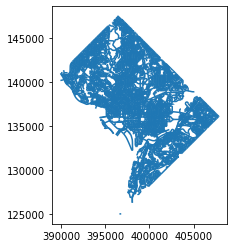

In [3]:
gdf_raw_road.plot()

<AxesSubplot:>

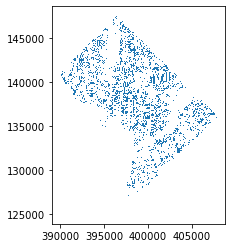

In [4]:
gdf_boundaries.plot()

In [21]:
len(list(gdf_boundaries['ROUTEID'].unique()))

1947

In [18]:
boundaries_shp_file.dtypes

AttributeError: 'str' object has no attribute 'dtypes'

In [13]:
def clip_gdf_one_by_one(to_be_clip_gdf, clipping_gdf):
    clipped_all = []
    for idx, row in clipping_gdf.iterrows():
        print(row['ROUTEID'])
        boundary = row['geometry']
        print(boundary)
        clipped = gpd.clip(to_be_clip_gdf, boundary)
        clipped_all.append(clipped)
        
    return clipped_all
        
clipped_all = clip_gdf_one_by_one(gdf_raw_road, gdf_boundaries[2:3])

13059452
POLYGON ((400573.055399999 132694.9316999987, 400573.055399999 132744.9316999987, 400623.055399999 132744.9316999987, 400623.055399999 132694.9316999987, 400573.055399999 132694.9316999987))


<AxesSubplot:>

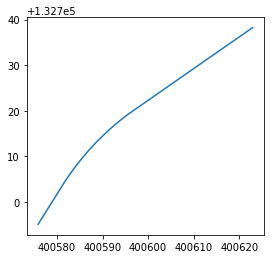

In [10]:
clipped_all[0].plot()

In [143]:
pip install pygeos

Note: you may need to restart the kernel to use updated packages.


# Nearest 

In [ ]:
boundaries_shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\DC_Roadway_Block-shp\Roadway_EPSG6487_midpoint_50m_squire.shp'
raw_road_shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\DC_Roadway_Block-shp\Roadway_Block6487.shp'

gdf_raw_road = gpd.read_file(raw_road_shp_file)
gdf_boundaries = gpd.read_file(boundaries_shp_file)boundaries_shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\DC_Roadway_Block-shp\Roadway_EPSG6487_midpoint_50m_squire.shp'
raw_road_shp_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\DC_Roadway_Block-shp\Roadway_Block6487.shp'

gdf_raw_road = gpd.read_file(raw_road_shp_file)
gdf_boundaries = gpd.read_file(boundaries_shp_file)

In [26]:
import itertools
from operator import itemgetter

import geopandas as gpd
import numpy as np
import pandas as pd

from scipy.spatial import cKDTree
from shapely.geometry import Point, LineString

gpd1 = gpd.GeoDataFrame([['John', 1, Point(1, 1)],
                         ['Smith', 1, Point(2, 2)],
                         ['Soap', 1, Point(0, 2)]],
                        columns=['Name', 'ID', 'geometry'])

gpd2 = gpd.GeoDataFrame([['Work', LineString([Point(100, 0), Point(100, 1)])],
                         ['Shops', LineString([Point(101, 0), Point(101, 1), Point(102, 3)])],
                         ['Home',  LineString([Point(101, 0), Point(102, 1)])]],
                        columns=['Place', 'geometry'])


def ckdnearest(gdfA, gdfB, gdfB_cols=['Place']):
    A = np.concatenate(
        [np.array(geom.coords) for geom in gdfA.geometry.to_list()])
    B = [np.array(geom.coords) for geom in gdfB.geometry.to_list()]
    B_ix = tuple(itertools.chain.from_iterable(
        [itertools.repeat(i, x) for i, x in enumerate(list(map(len, B)))]))
    B = np.concatenate(B)
    ckd_tree = cKDTree(B)
    dist, idx = ckd_tree.query(A, k=1)
    idx = itemgetter(*idx)(B_ix)
    gdf = pd.concat(
        [gdfA, gdfB.loc[idx, gdfB_cols].reset_index(drop=True),
         pd.Series(dist, name='dist')], axis=1)
    return gdf

c = ckdnearest(gpd1, gpd2)

In [25]:
c

,Name,ID,geometry,Place,dist
0,John,1,POINT (1.00000 1.00000),Work,99.000000
1,Smith,1,POINT (2.00000 2.00000),Work,98.005102
2,Soap,1,POINT (0.00000 2.00000),Work,100.005000


# Extract centerline

In [186]:
#pip install centerline

In [10]:
from shapely.geometry import Polygon
from centerline.geometry import Centerline

OSError: [WinError 126] The specified module could not be found

In [20]:
polygon_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\Sidewalks\Sidewalks_EPSG6487_clip_single.shp'
gdf = gpd.read_file(polygon_file)
gdf.head(1)

,OBJECTID,GIS_ID,FEATURECOD,DESCRIPTIO,CAPTUREYEA,CAPTUREACT,Shape_Leng,Shape_Area,value,ORIG_FID,geometry
0,1,SidewalkPly_1,1480,Sidewalk,2015-04-24,E,75.912111,54.682443,1,0,"POLYGON ((400606.035 137251.498, 400606.026 13..."


In [21]:
sidewalk_gdf = gdf[gdf["DESCRIPTIO"] == "Sidewalk"].copy()
sidewalk_gdf.head(1)

,OBJECTID,GIS_ID,FEATURECOD,DESCRIPTIO,CAPTUREYEA,CAPTUREACT,Shape_Leng,Shape_Area,value,ORIG_FID,geometry
0,1,SidewalkPly_1,1480,Sidewalk,2015-04-24,E,75.912111,54.682443,1,0,"POLYGON ((400606.035 137251.498, 400606.026 13..."


Processed:  0 1
Processed:  100 102
Processed:  200 218
Processed:  300 332
Processed:  400 524
Processed:  500 856
Error: idx,  row["OBJECTID"] 595 1003 Number of produced ridges is too small. Please adjust your interpolation distance.
Processed:  600 1009
Processed:  700 1140
Processed:  800 1285
Processed:  900 1455
Processed:  1000 1603
Processed:  1100 1740
Processed:  1200 1891
Processed:  1300 2045
Processed:  1400 2190
Processed:  1500 2318
Processed:  1600 2515
Processed:  1700 2646
Processed:  1800 2743
Processed:  1900 2892
Processed:  2000 3020
Processed:  2100 3120
Processed:  2200 3824
Processed:  2300 3973
Processed:  2400 4146
Processed:  2500 4324
Processed:  2600 4504
Processed:  2700 4673
Processed:  2800 4831
Processed:  2900 4983
Processed:  3000 5111
Processed:  3100 5369
Processed:  3200 5613
Processed:  3300 5832
Processed:  3400 5952
Processed:  3500 6070
Processed:  3600 6353
Processed:  3700 6471
Processed:  3800 6593
Processed:  3900 6925
Processed:  4000 71

Processed:  16600 31627
Processed:  16700 31805
Processed:  16800 31981
Processed:  16900 32199
Processed:  17000 32377
Error: idx,  row["OBJECTID"] 17081 32511 Number of produced ridges is too small. Please adjust your interpolation distance.
Processed:  17100 32535
Processed:  17200 32738
Processed:  17300 32938
Processed:  17400 33118
Error: idx,  row["OBJECTID"] 17436 33185 Number of produced ridges is too small. Please adjust your interpolation distance.
Processed:  17500 33310
Processed:  17600 33504
Processed:  17700 33665
Error: idx,  row["OBJECTID"] 17771 33799 Number of produced ridges is too small. Please adjust your interpolation distance.
Processed:  17800 33844
Processed:  17900 34037
Processed:  18000 34215
Processed:  18100 34403
Processed:  18200 34603
Processed:  18300 34790
Processed:  18400 34960
Processed:  18500 35153
Error: idx,  row["OBJECTID"] 18595 35368 Number of produced ridges is too small. Please adjust your interpolation distance.
Processed:  18600 35375


Processed:  28000 54300
Processed:  28100 54475
Processed:  28200 54682
Error: idx,  row["OBJECTID"] 28293 54870 Number of produced ridges is too small. Please adjust your interpolation distance.
Processed:  28300 54883
Error: idx,  row["OBJECTID"] 28321 54941 QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull v Qz Qbb Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1933580950  voronoi  Qz-infinity-point  Qbbound-last  Qcoplanar-keep
  _pre-merge  _zero-centrum  Qinterior-keep  Pgood  _max-width 0.043
  Error-roundoff 6.4e-16  _one-merge 4.5e-15  Visible-distance 1.3e-15
  U-max-coplanar 1.3e-15  Width-outside 2.5e-15  _wide-facet 7.6e-15
  _maxoutside 5.1e-15

precision problems (corrected unless 'Q0' or an error)
      2 degenerate hyperplanes recomputed with gaussian elimination
      2 nearly singular or axis-parallel hyperplanes
      2 zero divisors during back substitute
      2 zero divisors

<AxesSubplot:>

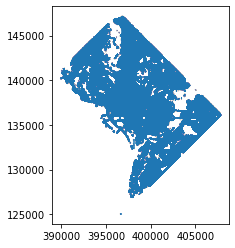

In [23]:
centerlines_row = []

centerlines_geo = []
for idx, row in (sidewalk_gdf[0:].iterrows()):
    try:
        
        polygon = row['geometry']
        attri = row.drop('geometry', axis=0).to_dict()
        # print(attri)
        centerline = Centerline(polygon, interpolation_distance=0.1,  **attri)
        centerlines_geo.append(centerline)
        centerlines_row.append(attri)
        
        if idx % 100 == 0:
            print("Processed: ", idx, row["OBJECTID"])
        
    except Exception as e:
        print('Error: idx,  row["OBJECTID"]', idx, row["OBJECTID"], e)
        continue

centerline_df = pd.DataFrame(centerlines_row)
centerline_gdf = gpd.GeoDataFrame(centerline_df, geometry=centerlines_geo)
centerline_gdf.plot()

In [91]:
centerline_gdf.to_file("centerlines.shp")

In [246]:
centerline_gdf.dtypes

OBJECTID         int64
GIS_ID          object
FEATURECOD       int64
DESCRIPTIO      object
CAPTUREYEA      object
CAPTUREACT      object
Shape_Leng     float64
Shape_Area     float64
value            int64
geometry      geometry
dtype: object

In [190]:
! create_centerlines %polygon_file

Usage: create_centerlines [OPTIONS] SRC DST
Try 'create_centerlines --help' for help.

Error: Invalid value for 'SRC': Path '%polygon_file' does not exist.


## use label_centerlines

In [6]:
polygon_file = r'E:\USC_OneDrive\OneDrive - University of South Carolina\Research\sidewalk_wheelchair\vectors\Sidewalks\Sidewalks_EPSG6487_clip_single.shp'
gdf = gpd.read_file(polygon_file)
gdf.head(1)

,OBJECTID,GIS_ID,FEATURECOD,DESCRIPTIO,CAPTUREYEA,CAPTUREACT,Shape_Leng,Shape_Area,value,ORIG_FID,geometry
0,1,SidewalkPly_1,1480,Sidewalk,2015-04-24,E,75.912111,54.682443,1,0,"POLYGON ((400606.035 137251.498, 400606.026 13..."


In [2]:
from label_centerlines import get_centerline

2it [00:01,  1.75it/s]


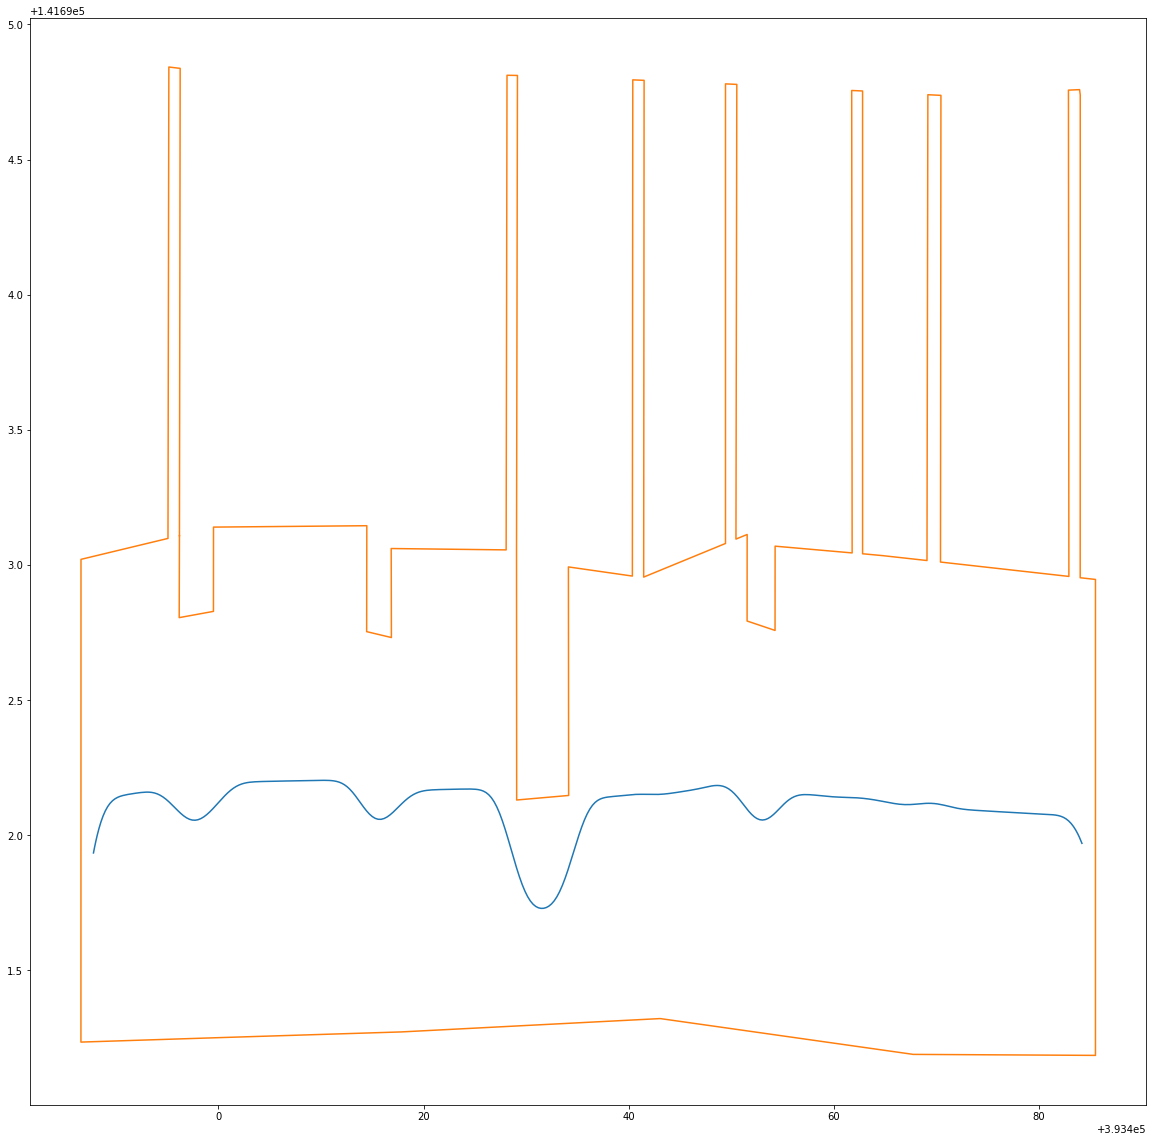

In [71]:
from label_centerlines import get_centerline
from tqdm import tqdm

lines = []
for idx, row in tqdm(gdf.loc[7:8].iterrows()): 
    try:  
        polygon = row['geometry']
        result = get_centerline(polygon, segmentize_maxlen=0.5, max_points=3000, simplification=0.05, smooth_sigma=5)
        lines.append(result)
        if idx % 100 == 0:
            print(idx)
    except Exception as e:
        print(e)
        continue
        
fig  = plt.figure(figsize=(20,20))
plt.plot(*result.xy)
plt.plot(*polygon.exterior.xy)

In [72]:
result.length

96.39418486842624

In [12]:
import plotly

In [11]:
pip install plotly

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=90bd0b6fd37a4e2c04805809782ac47e00a3a1f530542c8a1c4298cf8bca71b7
  Stored in directory: c:\users\gpu\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [1]:
import multiprocessing

def double(a):
    return a * 2

def driver_func():
    PROCESSES = 4
    with multiprocessing.Pool(PROCESSES) as pool:
        params = [(1, ), (2, ), (3, ), (4, )]
        results = [pool.apply_async(double, p) for p in params]

        for r in results:
            print('\t', r.get())

In [ ]:
import multiprocessing  
import random
from multiprocessing import Pool
import os

def foo(x):
    print(os.getpid(), x)

if __name__ == '__main__':
    process_cnt = 4
    pool = Pool(processes=process_cnt)
    
    for i in range(process_cnt):
        pool.apply_async(foo, (20,))
    pool.close()
    pool.join()
    
    
    
    

In [8]:
pip install defs

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement defs
ERROR: No matching distribution found for defs
